# Predictive Analytics System  
by Anubroto Ghose
   
# Project Description:
 
The goal of this project is to create a predictive analytics system using Python and Scikit/Sklearn, numpy, pandas and Matplotlib. This system will leverage machine learning paradigms such as supervised learning and unsupervised learning to predict future outcomes based on historical data.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Project Steps:

# Data Collection

I have taken a dataset from https://www.kaggle.com/datasets/milanzdravkovic/pharma-sales-data.
Which contains six years data (2014-2019) on sales of drugs classified in 8 ATC categories. 

In [2]:
df_daily = pd.read_csv('./archive(1)/salesdaily.csv', parse_dates=['datum'])
df_daily.head()

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month   
0  01-02-2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1  \
1  01-03-2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  01-04-2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  01-05-2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  01-06-2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday

In [3]:
df_daily['datum'] = pd.to_datetime(df_daily['datum'], format='mixed')
df_daily

datum  M01AB   M01AE  N02BA  N02BE  N05B  N05C   R03   R06  Year   
0    2014-01-02   0.00   3.670   3.40  32.40   7.0   0.0   0.0  2.00  2014  \
1    2014-01-03   8.00   4.000   4.40  50.60  16.0   0.0  20.0  4.00  2014   
2    2014-01-04   2.00   1.000   6.50  61.85  10.0   0.0   9.0  1.00  2014   
3    2014-01-05   4.00   3.000   7.00  41.10   8.0   0.0   3.0  0.00  2014   
4    2014-01-06   5.00   1.000   4.50  21.70  16.0   2.0   6.0  2.00  2014   
...         ...    ...     ...    ...    ...   ...   ...   ...   ...   ...   
2101 2019-10-04   7.34   5.683   2.25  22.45  13.0   0.0   1.0  1.00  2019   
2102 2019-10-05   3.84   5.010   6.00  25.40   7.0   0.0   0.0  0.33  2019   
2103 2019-10-06   4.00  11.690   2.00  34.60   6.0   0.0   5.0  4.20  2019   
2104 2019-10-07   7.34   4.507   3.00  50.80   6.0   0.0  10.0  1.00  2019   
2105 2019-10-08   0.33   1.730   0.50  44.30  20.0   2.0   2.0  0.00  2019   

      Month  Hour Weekday Name  
0         1   248     Thursday  
1         1   276       Friday  
2         1   276     Saturday  
3         1   276       Sunday  
4         1   276       Monday  
...     ...   ...          ...  
2101     10   276       Friday  
2102     10   276     Saturday  
2103     10   276       Sunday  
2104     10   276       Monday  
2105     10   190      Tuesday  

[2106 rows x 13 columns]

In [4]:
df_daily.sort_values(by='datum', inplace=True)
df_daily

datum  M01AB   M01AE  N02BA  N02BE  N05B  N05C   R03   R06  Year   
0    2014-01-02   0.00   3.670   3.40  32.40   7.0   0.0   0.0  2.00  2014  \
1    2014-01-03   8.00   4.000   4.40  50.60  16.0   0.0  20.0  4.00  2014   
2    2014-01-04   2.00   1.000   6.50  61.85  10.0   0.0   9.0  1.00  2014   
3    2014-01-05   4.00   3.000   7.00  41.10   8.0   0.0   3.0  0.00  2014   
4    2014-01-06   5.00   1.000   4.50  21.70  16.0   2.0   6.0  2.00  2014   
...         ...    ...     ...    ...    ...   ...   ...   ...   ...   ...   
2101 2019-10-04   7.34   5.683   2.25  22.45  13.0   0.0   1.0  1.00  2019   
2102 2019-10-05   3.84   5.010   6.00  25.40   7.0   0.0   0.0  0.33  2019   
2103 2019-10-06   4.00  11.690   2.00  34.60   6.0   0.0   5.0  4.20  2019   
2104 2019-10-07   7.34   4.507   3.00  50.80   6.0   0.0  10.0  1.00  2019   
2105 2019-10-08   0.33   1.730   0.50  44.30  20.0   2.0   2.0  0.00  2019   

      Month  Hour Weekday Name  
0         1   248     Thursday  
1         1   276       Friday  
2         1   276     Saturday  
3         1   276       Sunday  
4         1   276       Monday  
...     ...   ...          ...  
2101     10   276       Friday  
2102     10   276     Saturday  
2103     10   276       Sunday  
2104     10   276       Monday  
2105     10   190      Tuesday  

[2106 rows x 13 columns]

In [5]:
df_daily['datum'] = pd.to_datetime(df_daily['datum'], errors='coerce')
df_daily = df_daily.dropna(subset=['datum'])
df_daily

datum  M01AB   M01AE  N02BA  N02BE  N05B  N05C   R03   R06  Year   
0    2014-01-02   0.00   3.670   3.40  32.40   7.0   0.0   0.0  2.00  2014  \
1    2014-01-03   8.00   4.000   4.40  50.60  16.0   0.0  20.0  4.00  2014   
2    2014-01-04   2.00   1.000   6.50  61.85  10.0   0.0   9.0  1.00  2014   
3    2014-01-05   4.00   3.000   7.00  41.10   8.0   0.0   3.0  0.00  2014   
4    2014-01-06   5.00   1.000   4.50  21.70  16.0   2.0   6.0  2.00  2014   
...         ...    ...     ...    ...    ...   ...   ...   ...   ...   ...   
2101 2019-10-04   7.34   5.683   2.25  22.45  13.0   0.0   1.0  1.00  2019   
2102 2019-10-05   3.84   5.010   6.00  25.40   7.0   0.0   0.0  0.33  2019   
2103 2019-10-06   4.00  11.690   2.00  34.60   6.0   0.0   5.0  4.20  2019   
2104 2019-10-07   7.34   4.507   3.00  50.80   6.0   0.0  10.0  1.00  2019   
2105 2019-10-08   0.33   1.730   0.50  44.30  20.0   2.0   2.0  0.00  2019   

      Month  Hour Weekday Name  
0         1   248     Thursday  
1         1   276       Friday  
2         1   276     Saturday  
3         1   276       Sunday  
4         1   276       Monday  
...     ...   ...          ...  
2101     10   276       Friday  
2102     10   276     Saturday  
2103     10   276       Sunday  
2104     10   276       Monday  
2105     10   190      Tuesday  

[2106 rows x 13 columns]

In [6]:
df_daily.set_index('datum', inplace=True)

In [7]:
df_daily.tail()

M01AB   M01AE  N02BA  N02BE  N05B  N05C   R03   R06  Year  Month   
datum                                                                          
2019-10-04   7.34   5.683   2.25  22.45  13.0   0.0   1.0  1.00  2019     10  \
2019-10-05   3.84   5.010   6.00  25.40   7.0   0.0   0.0  0.33  2019     10   
2019-10-06   4.00  11.690   2.00  34.60   6.0   0.0   5.0  4.20  2019     10   
2019-10-07   7.34   4.507   3.00  50.80   6.0   0.0  10.0  1.00  2019     10   
2019-10-08   0.33   1.730   0.50  44.30  20.0   2.0   2.0  0.00  2019     10   

            Hour Weekday Name  
datum                          
2019-10-04   276       Friday  
2019-10-05   276     Saturday  
2019-10-06   276       Sunday  
2019-10-07   276       Monday  
2019-10-08   190      Tuesday

In [8]:
print(df_daily)

            M01AB   M01AE  N02BA  N02BE  N05B  N05C   R03   R06  Year  Month   
datum                                                                          
2014-01-02   0.00   3.670   3.40  32.40   7.0   0.0   0.0  2.00  2014      1  \
2014-01-03   8.00   4.000   4.40  50.60  16.0   0.0  20.0  4.00  2014      1   
2014-01-04   2.00   1.000   6.50  61.85  10.0   0.0   9.0  1.00  2014      1   
2014-01-05   4.00   3.000   7.00  41.10   8.0   0.0   3.0  0.00  2014      1   
2014-01-06   5.00   1.000   4.50  21.70  16.0   2.0   6.0  2.00  2014      1   
...           ...     ...    ...    ...   ...   ...   ...   ...   ...    ...   
2019-10-04   7.34   5.683   2.25  22.45  13.0   0.0   1.0  1.00  2019     10   
2019-10-05   3.84   5.010   6.00  25.40   7.0   0.0   0.0  0.33  2019     10   
2019-10-06   4.00  11.690   2.00  34.60   6.0   0.0   5.0  4.20  2019     10   
2019-10-07   7.34   4.507   3.00  50.80   6.0   0.0  10.0  1.00  2019     10   
2019-10-08   0.33   1.730   0.50  44.30 

# Data Analysis

# Encoding the dataset into desired values

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_daily['Month'] = le.fit_transform(df_daily['Month'])
df_daily['Weekday Name']= le.fit_transform(df_daily['Weekday Name'])

In [10]:
df_daily.head()

M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month   
datum                                                                        
2014-01-02    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      0  \
2014-01-03    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      0   
2014-01-04    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      0   
2014-01-05    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      0   
2014-01-06    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      0   

            Hour  Weekday Name  
datum                           
2014-01-02   248             4  
2014-01-03   276             0  
2014-01-04   276             2  
2014-01-05   276             3  
2014-01-06   276             1

# Histogram of the dataset

C:\Users\anubr\AppData\Local\Temp\ipykernel_12820\2181668305.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_daily.hist(ax=ax, bins=20)


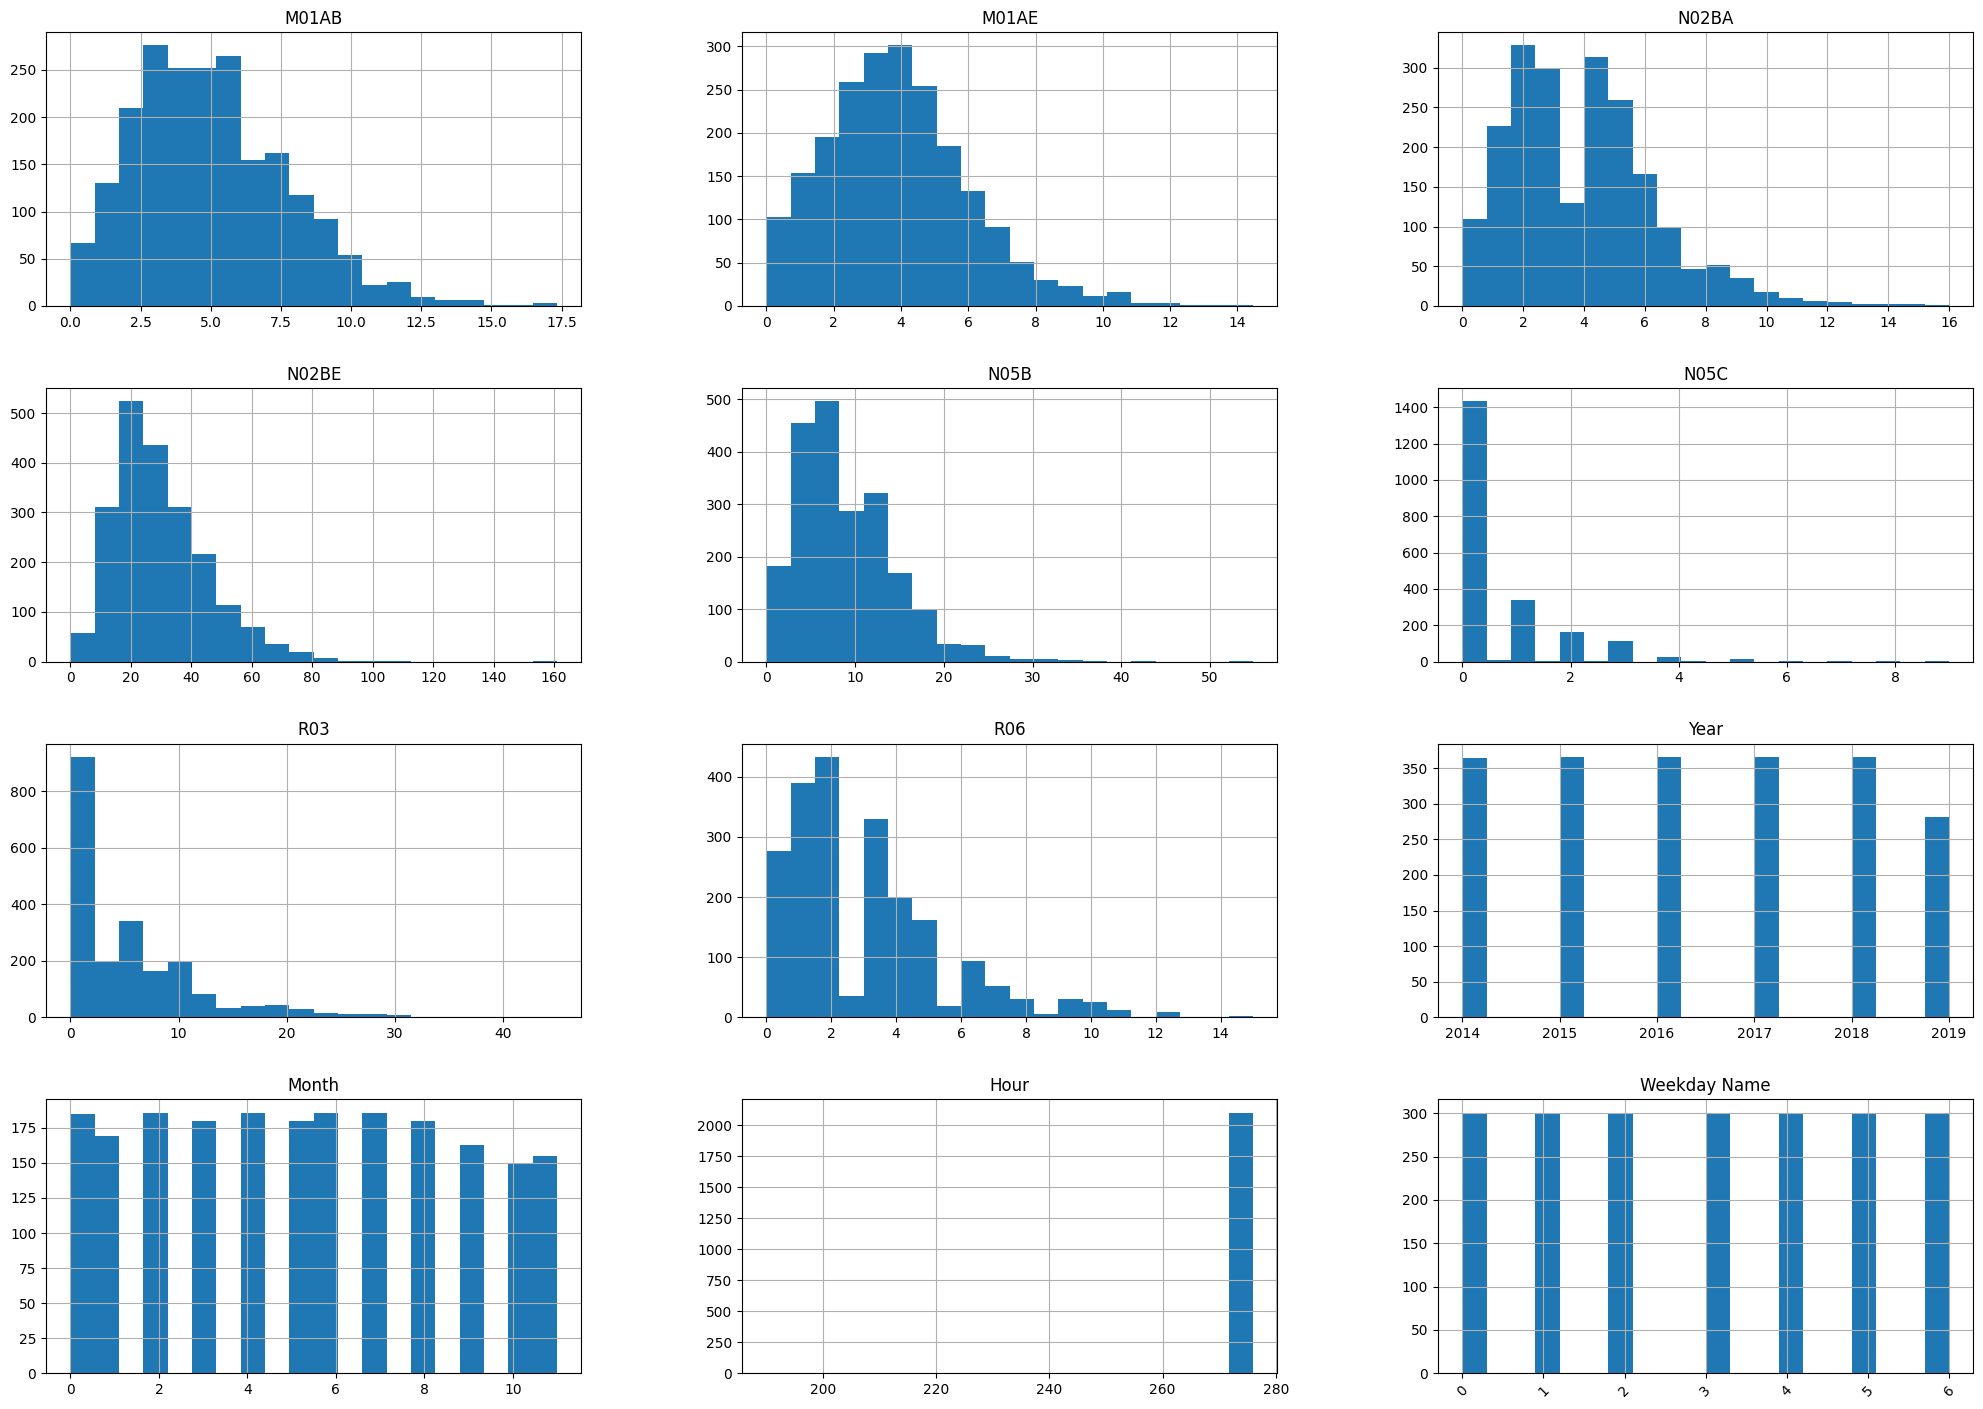

In [11]:
fig, ax = plt.subplots(figsize=(20, 14))
plt.tight_layout()

df_daily.hist(ax=ax, bins=20)

plt.xticks(rotation=45)

plt.show()

Listing all the ATC Categories of drugs

In [12]:
features = df_daily[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
features

M01AB   M01AE  N02BA  N02BE  N05B  N05C   R03   R06
datum                                                          
2014-01-02   0.00   3.670   3.40  32.40   7.0   0.0   0.0  2.00
2014-01-03   8.00   4.000   4.40  50.60  16.0   0.0  20.0  4.00
2014-01-04   2.00   1.000   6.50  61.85  10.0   0.0   9.0  1.00
2014-01-05   4.00   3.000   7.00  41.10   8.0   0.0   3.0  0.00
2014-01-06   5.00   1.000   4.50  21.70  16.0   2.0   6.0  2.00
...           ...     ...    ...    ...   ...   ...   ...   ...
2019-10-04   7.34   5.683   2.25  22.45  13.0   0.0   1.0  1.00
2019-10-05   3.84   5.010   6.00  25.40   7.0   0.0   0.0  0.33
2019-10-06   4.00  11.690   2.00  34.60   6.0   0.0   5.0  4.20
2019-10-07   7.34   4.507   3.00  50.80   6.0   0.0  10.0  1.00
2019-10-08   0.33   1.730   0.50  44.30  20.0   2.0   2.0  0.00

[2106 rows x 8 columns]

Checking for any correlation between the drugs

<Axes: >

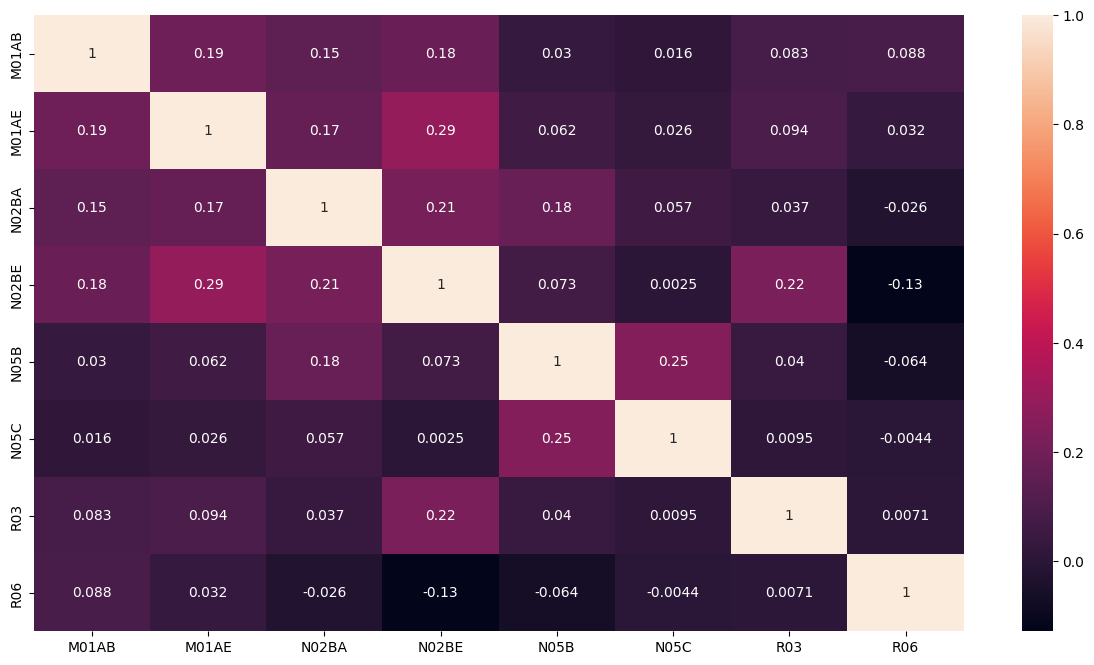

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(features.corr(),annot=True)

Plotting the sales of the drugs against the given months

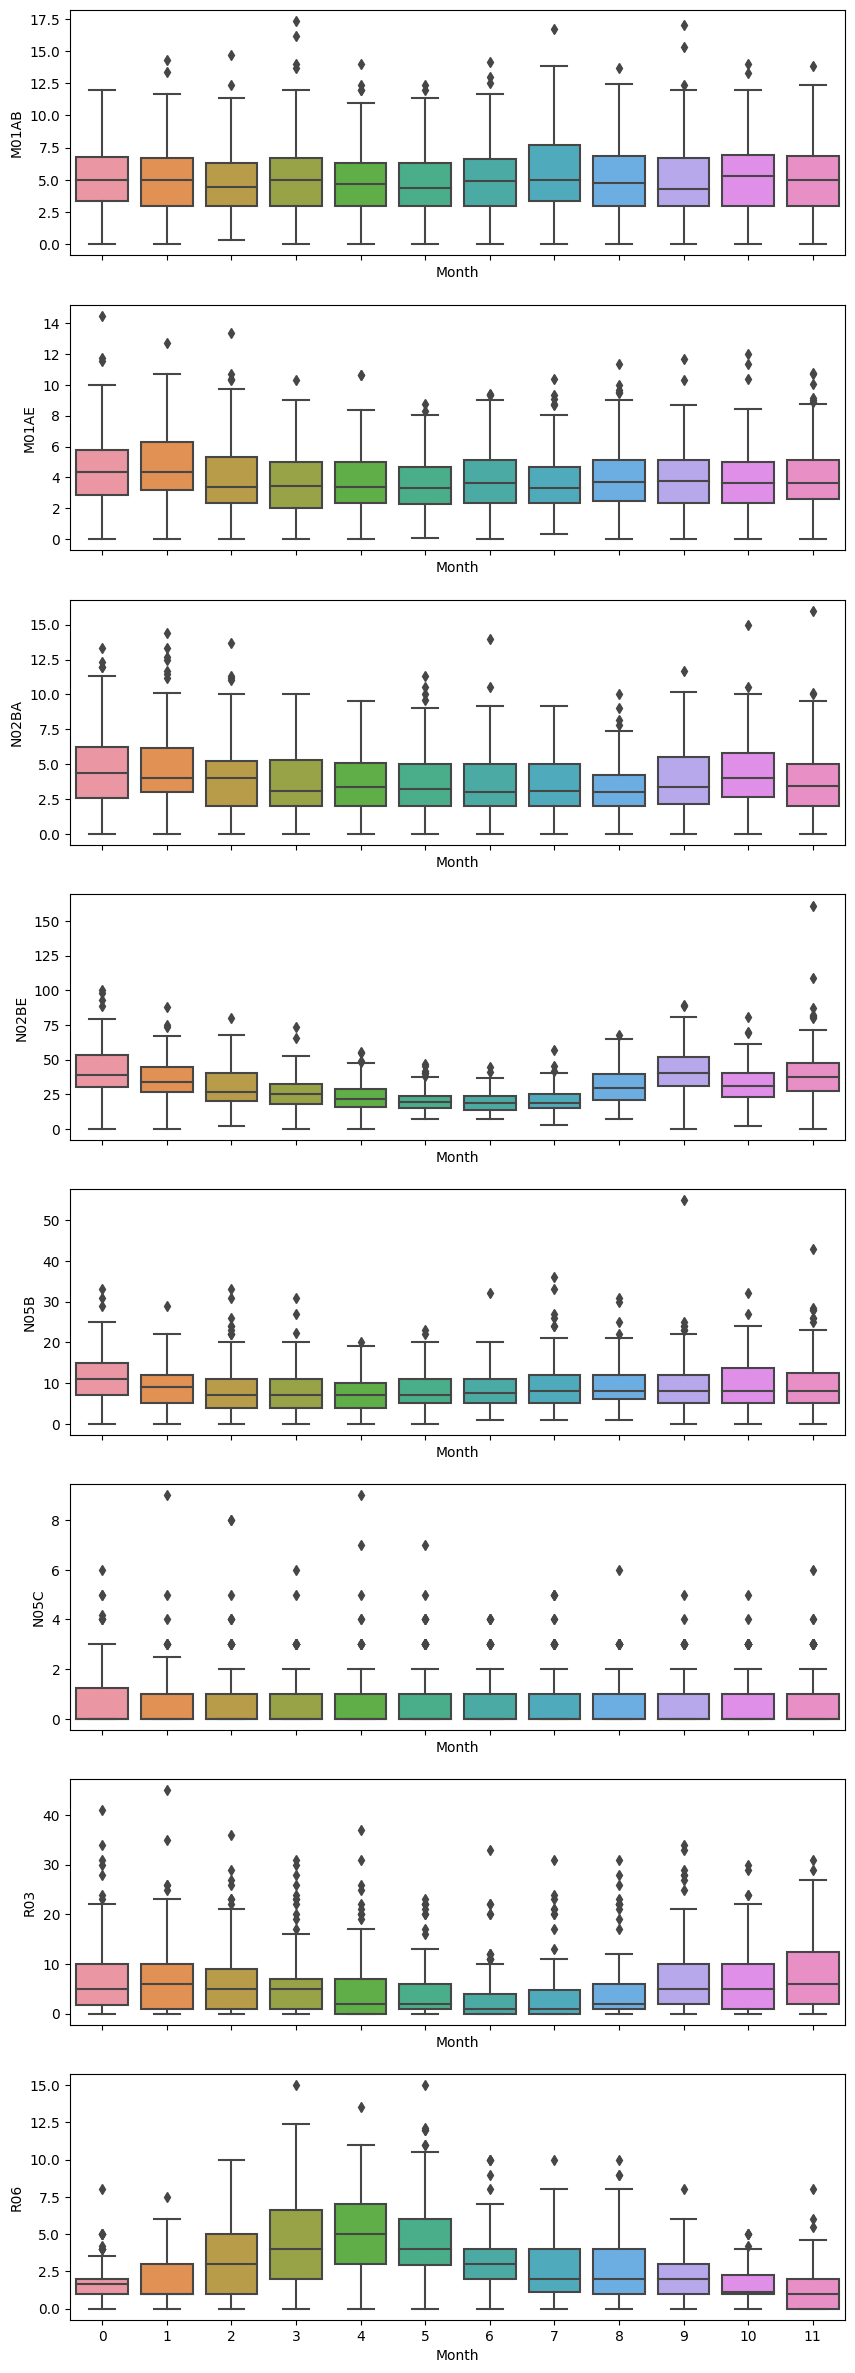

In [14]:
import seaborn as sns
fig, axes = plt.subplots(8, 1, figsize=(10, 30), sharex=True)
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data=df_daily, x='Month', y=name, ax=ax)

In [15]:
df_daily_m1 = df_daily[['M01AB','Month','Weekday Name']]
df_daily_m1

M01AB  Month  Weekday Name
datum                                 
2014-01-02   0.00      0             4
2014-01-03   8.00      0             0
2014-01-04   2.00      0             2
2014-01-05   4.00      0             3
2014-01-06   5.00      0             1
...           ...    ...           ...
2019-10-04   7.34      9             0
2019-10-05   3.84      9             2
2019-10-06   4.00      9             3
2019-10-07   7.34      9             1
2019-10-08   0.33      9             5

[2106 rows x 3 columns]

In [16]:
df_daily_m2 = df_daily[['M01AE','Month','Weekday Name']]
df_daily_m2

M01AE  Month  Weekday Name
datum                                  
2014-01-02   3.670      0             4
2014-01-03   4.000      0             0
2014-01-04   1.000      0             2
2014-01-05   3.000      0             3
2014-01-06   1.000      0             1
...            ...    ...           ...
2019-10-04   5.683      9             0
2019-10-05   5.010      9             2
2019-10-06  11.690      9             3
2019-10-07   4.507      9             1
2019-10-08   1.730      9             5

[2106 rows x 3 columns]

In [17]:
df_daily_m3 = df_daily[['N02BA','Month','Weekday Name']]
df_daily_m3

N02BA  Month  Weekday Name
datum                                 
2014-01-02   3.40      0             4
2014-01-03   4.40      0             0
2014-01-04   6.50      0             2
2014-01-05   7.00      0             3
2014-01-06   4.50      0             1
...           ...    ...           ...
2019-10-04   2.25      9             0
2019-10-05   6.00      9             2
2019-10-06   2.00      9             3
2019-10-07   3.00      9             1
2019-10-08   0.50      9             5

[2106 rows x 3 columns]

In [18]:
df_daily_m4 = df_daily[['N02BE','Month','Weekday Name']]
df_daily_m4

N02BE  Month  Weekday Name
datum                                 
2014-01-02  32.40      0             4
2014-01-03  50.60      0             0
2014-01-04  61.85      0             2
2014-01-05  41.10      0             3
2014-01-06  21.70      0             1
...           ...    ...           ...
2019-10-04  22.45      9             0
2019-10-05  25.40      9             2
2019-10-06  34.60      9             3
2019-10-07  50.80      9             1
2019-10-08  44.30      9             5

[2106 rows x 3 columns]

In [19]:
df_daily_m5 = df_daily[['N05B','Month','Weekday Name']]
df_daily_m5

N05B  Month  Weekday Name
datum                                
2014-01-02   7.0      0             4
2014-01-03  16.0      0             0
2014-01-04  10.0      0             2
2014-01-05   8.0      0             3
2014-01-06  16.0      0             1
...          ...    ...           ...
2019-10-04  13.0      9             0
2019-10-05   7.0      9             2
2019-10-06   6.0      9             3
2019-10-07   6.0      9             1
2019-10-08  20.0      9             5

[2106 rows x 3 columns]

In [20]:
df_daily_m6 = df_daily[['N05C','Month','Weekday Name']]
df_daily_m6

N05C  Month  Weekday Name
datum                                
2014-01-02   0.0      0             4
2014-01-03   0.0      0             0
2014-01-04   0.0      0             2
2014-01-05   0.0      0             3
2014-01-06   2.0      0             1
...          ...    ...           ...
2019-10-04   0.0      9             0
2019-10-05   0.0      9             2
2019-10-06   0.0      9             3
2019-10-07   0.0      9             1
2019-10-08   2.0      9             5

[2106 rows x 3 columns]

Plotting the sales of the drugs

Text(0.5, 0, 'Dates')

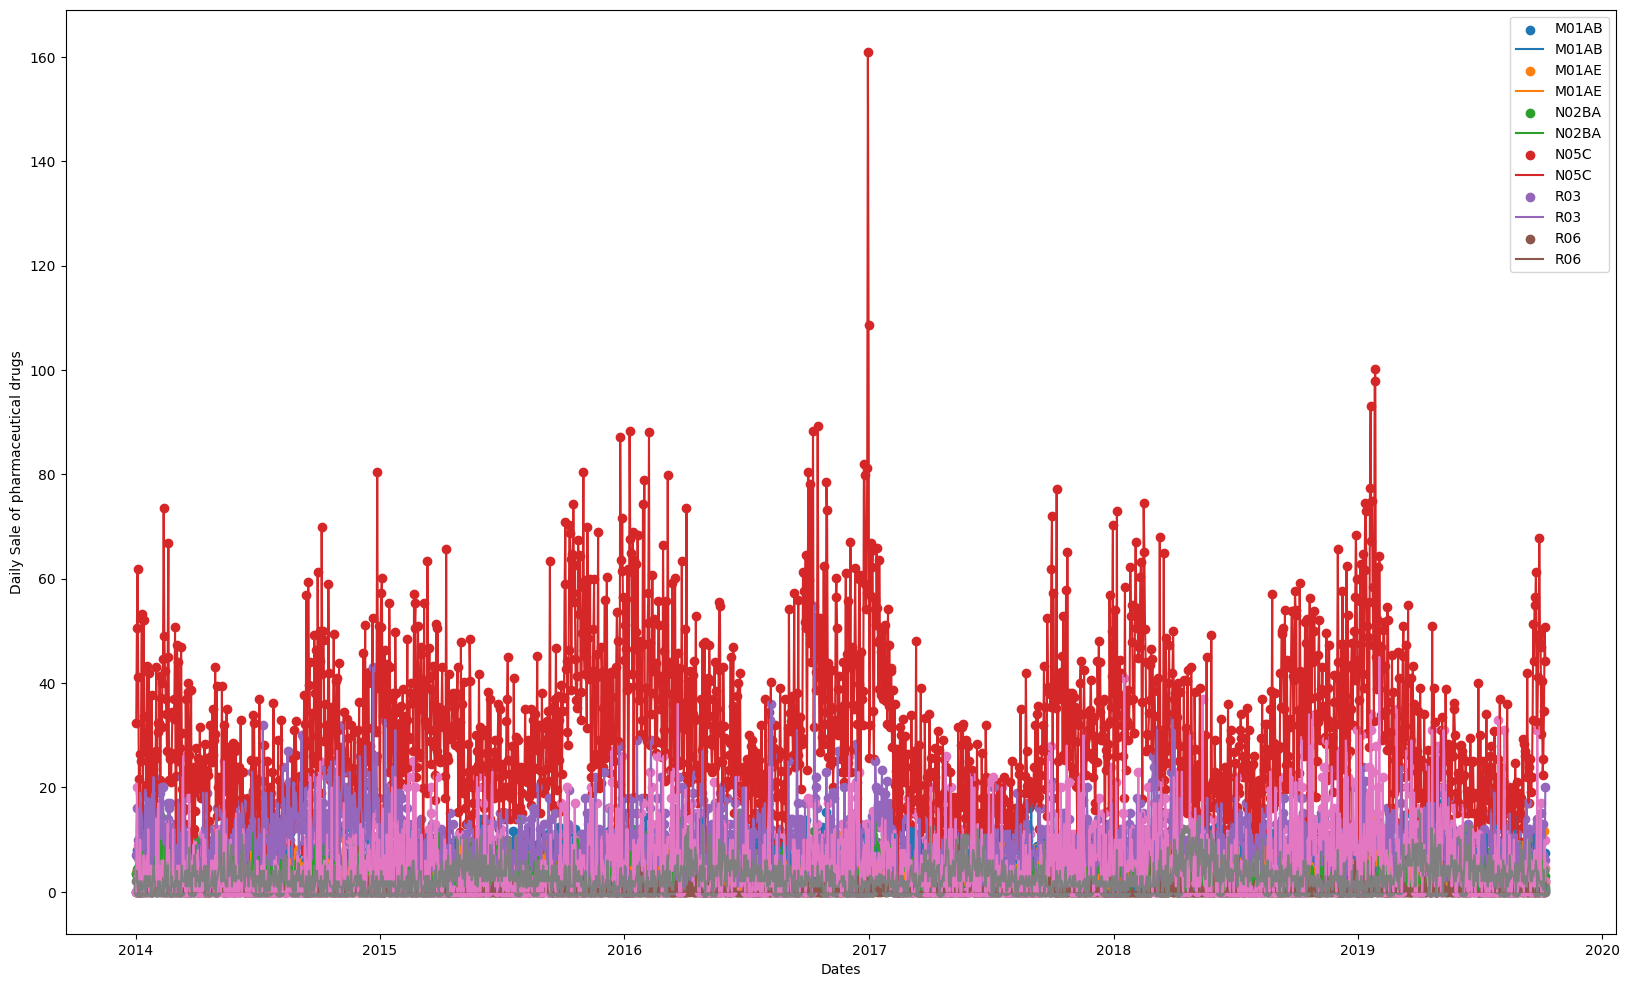

In [21]:
lst = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
plt.figure(figsize=(20, 12))
for i in lst:
    plt.scatter(df_daily.index,df_daily[[i]])
    plt.plot(df_daily.index,df_daily[[i]])
    
plt.legend(['M01AB','M01AB', 'M01AE','M01AE', 'N02BA','N02BA', 'N05C','N05C', 'R03','R03', 'R06','R06'], loc='upper right')
plt.ylabel('Daily Sale of pharmaceutical drugs')
plt.xlabel('Dates')


Plotting the sales of the drugs individually

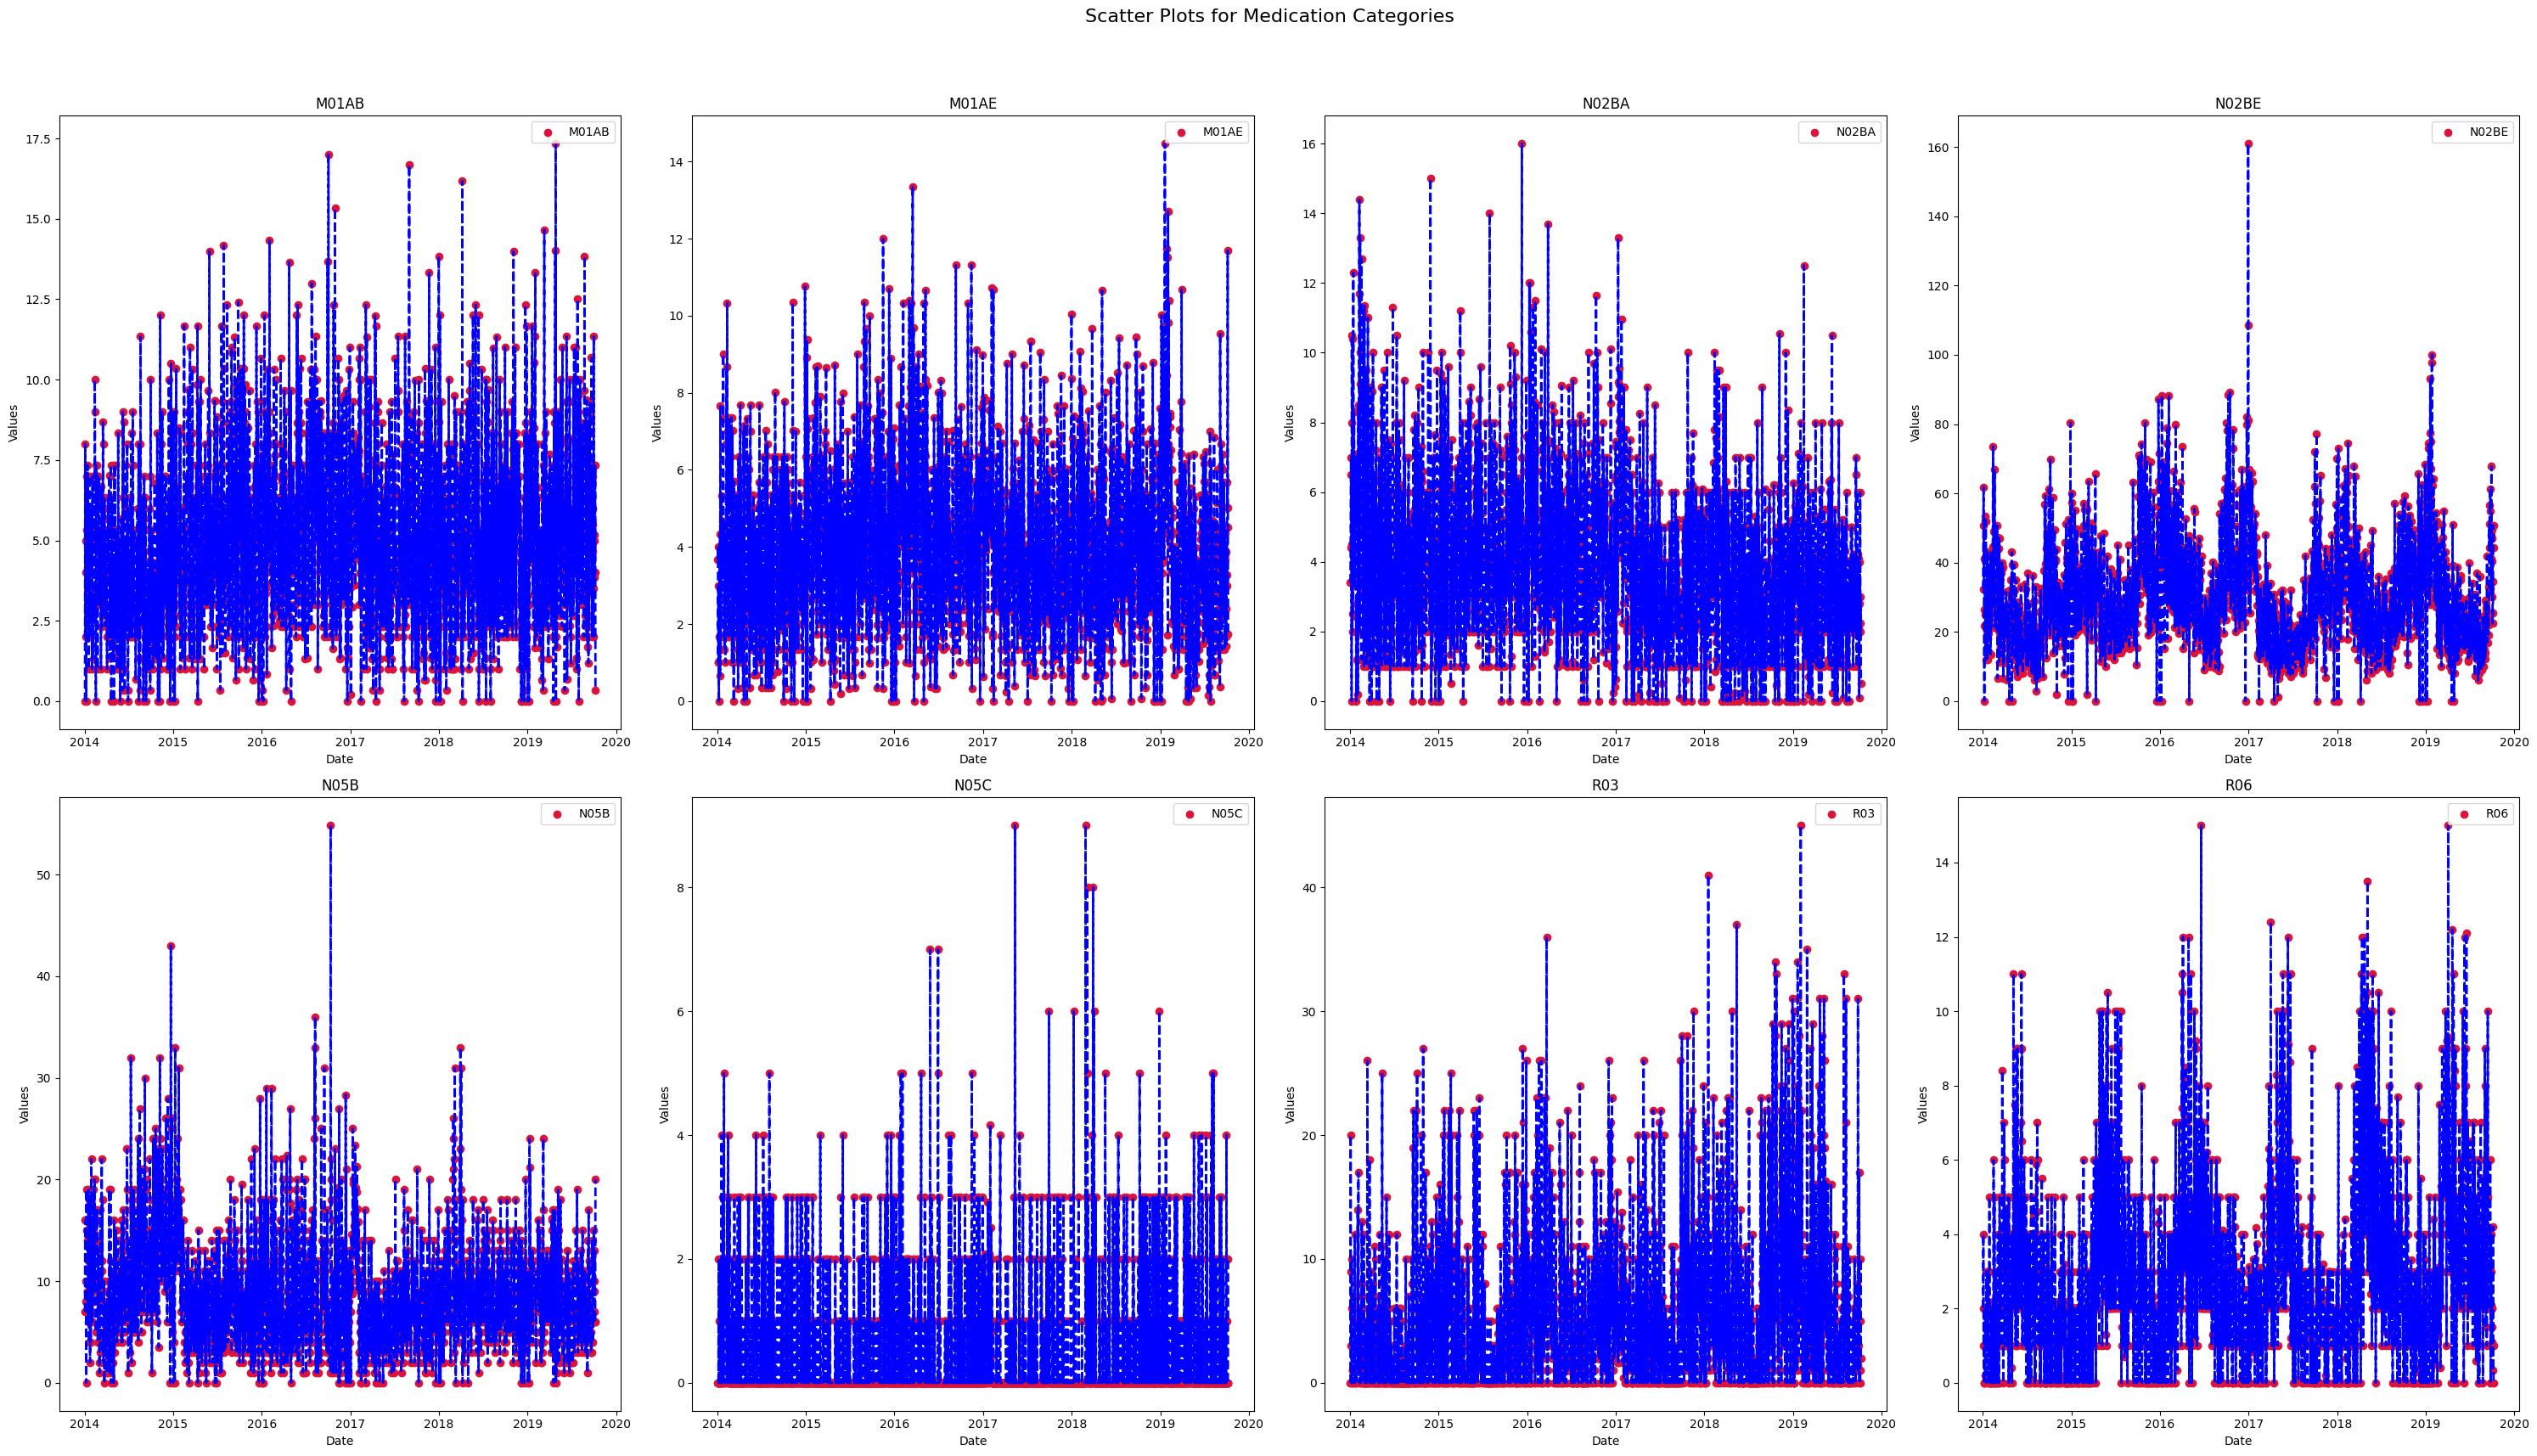

In [22]:
import matplotlib.pyplot as plt

lst = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 18))
fig.suptitle('Scatter Plots for Medication Categories', fontsize=16)

axes = axes.flatten()

for i, category in enumerate(lst):
    axes[i].scatter(df_daily.index, df_daily[category], label=category,color='crimson')
    axes[i].plot(df_daily.index, df_daily[category], linestyle='--', linewidth=2,color = "blue")
    axes[i].set_title(category)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Values')
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

# Displaying a demonstration of the entire process to predict future sales with the help of an example using sales data for the "M01AB" drug.

# Feature Engineering of the dataset
We are modifying the dataset to get both past and future sales against the sale of __M01AB__ drug at that indiviual day

In [23]:
df_daily_m1 = df_daily_m1.copy()
df_daily_m1.loc[:, 'Sale_LastDay'] = df_daily_m1['M01AB'].shift(+1)
df_daily_m1.loc[:, 'Sale_2Daysback'] = df_daily_m1['M01AB'].shift(+2)
df_daily_m1.loc[:, 'Sale_3Daysback'] = df_daily_m1['M01AB'].shift(+3)
df_daily_m1.loc[:, 'Sale_FutureDay'] = df_daily_m1['M01AB'].shift(-1)
df_daily_m1.loc[:, 'Sale_2Daysafter'] = df_daily_m1['M01AB'].shift(-2)
df_daily_m1.loc[:, 'Sale_3Daysafter'] = df_daily_m1['M01AB'].shift(-3)
df_daily_m1


M01AB  Month  Weekday Name  Sale_LastDay  Sale_2Daysback   
datum                                                                  
2014-01-02   0.00      0             4           NaN             NaN  \
2014-01-03   8.00      0             0          0.00             NaN   
2014-01-04   2.00      0             2          8.00            0.00   
2014-01-05   4.00      0             3          2.00            8.00   
2014-01-06   5.00      0             1          4.00            2.00   
...           ...    ...           ...           ...             ...   
2019-10-04   7.34      9             0          5.00            5.18   
2019-10-05   3.84      9             2          7.34            5.00   
2019-10-06   4.00      9             3          3.84            7.34   
2019-10-07   7.34      9             1          4.00            3.84   
2019-10-08   0.33      9             5          7.34            4.00   

            Sale_3Daysback  Sale_FutureDay  Sale_2Daysafter  Sale_3Daysafter  
datum                                                                         
2014-01-02             NaN            8.00             2.00             4.00  
2014-01-03             NaN            2.00             4.00             5.00  
2014-01-04             NaN            4.00             5.00             0.00  
2014-01-05            0.00            5.00             0.00             5.33  
2014-01-06            8.00            0.00             5.33             7.00  
...                    ...             ...              ...              ...  
2019-10-04           11.34            3.84             4.00             7.34  
2019-10-05            5.18            4.00             7.34             0.33  
2019-10-06            5.00            7.34             0.33              NaN  
2019-10-07            7.34            0.33              NaN              NaN  
2019-10-08            3.84             NaN              NaN              NaN  

[2106 rows x 9 columns]

Dropping the rows with NA values

Data Cleaning

In [24]:
df_daily_m1=df_daily_m1.dropna()
df_daily_m1

M01AB  Month  Weekday Name  Sale_LastDay  Sale_2Daysback   
datum                                                                  
2014-01-05   4.00      0             3          2.00            8.00  \
2014-01-06   5.00      0             1          4.00            2.00   
2014-01-07   0.00      0             5          5.00            4.00   
2014-01-08   5.33      0             6          0.00            5.00   
2014-01-09   7.00      0             4          5.33            0.00   
...           ...    ...           ...           ...             ...   
2019-10-01  11.34      9             5          2.00            3.51   
2019-10-02   5.18      9             6         11.34            2.00   
2019-10-03   5.00      9             4          5.18           11.34   
2019-10-04   7.34      9             0          5.00            5.18   
2019-10-05   3.84      9             2          7.34            5.00   

            Sale_3Daysback  Sale_FutureDay  Sale_2Daysafter  Sale_3Daysafter  
datum                                                                         
2014-01-05            0.00            5.00             0.00             5.33  
2014-01-06            8.00            0.00             5.33             7.00  
2014-01-07            2.00            5.33             7.00             5.00  
2014-01-08            4.00            7.00             5.00             5.00  
2014-01-09            5.00            5.00             5.00             2.00  
...                    ...             ...              ...              ...  
2019-10-01            7.00            5.18             5.00             7.34  
2019-10-02            3.51            5.00             7.34             3.84  
2019-10-03            2.00            7.34             3.84             4.00  
2019-10-04           11.34            3.84             4.00             7.34  
2019-10-05            5.18            4.00             7.34             0.33  

[2100 rows x 9 columns]

Choosing the best hyperparameters of our models

In [25]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

def hyperparameterised(df, i):
    df_cleaned = df[[i, 'Sale_LastDay', 'Sale_2Daysback', 'Sale_3Daysback','Sale_FutureDay','Sale_2Daysafter','Sale_3Daysafter','Month','Weekday Name']].dropna()
    features = df_cleaned[['Sale_LastDay', 'Sale_2Daysback', 'Sale_3Daysback','Sale_FutureDay','Sale_2Daysafter','Sale_3Daysafter','Month','Weekday Name']]
    target = df_cleaned[i]
    sc = StandardScaler()
    features = sc.fit_transform(features)
    
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    gboost_model = GradientBoostingRegressor()
    param_grid_gboost = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }

    grid_search_gboost = GridSearchCV(gboost_model, param_grid_gboost, scoring='neg_mean_squared_error', cv=5,n_jobs=10)
    grid_search_gboost.fit(X_train, y_train)
    print("Best parameters for Gradient Boosting:", grid_search_gboost.best_params_)

    lasso_model = Lasso()
    param_grid_lasso = {
        'alpha': [0.01, 0.1, 1, 10]
    }

    grid_search_lasso = GridSearchCV(lasso_model, param_grid_lasso, scoring='neg_mean_squared_error', cv=5,n_jobs=10)
    grid_search_lasso.fit(X_train, y_train)
    print("Best parameters for Lasso:", grid_search_lasso.best_params_)

    ridge_model = Ridge()
    param_grid_ridge = {
        'alpha': [0.01, 0.1, 1, 10]
    }

    grid_search_ridge = GridSearchCV(ridge_model, param_grid_ridge, scoring='neg_mean_squared_error', cv=5,n_jobs=10)
    grid_search_ridge.fit(X_train, y_train)
    print("Best parameters for Ridge:", grid_search_ridge.best_params_)

    lin_model = LinearRegression()
    param_grid_lin = {
        'fit_intercept': [True, False],
        'copy_X': [True, False]
    }

    grid_search_lin = GridSearchCV(lin_model, param_grid_lin, scoring='neg_mean_squared_error', cv=5,n_jobs=10)
    grid_search_lin.fit(X_train, y_train)
    print("Best parameters for Linear Regression:", grid_search_lin.best_params_)
    
    rf_model = RandomForestRegressor()
    param_grid_rf = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search_rf = GridSearchCV(rf_model, param_grid_rf, scoring='neg_mean_squared_error', cv=5,n_jobs=10)
    grid_search_rf.fit(X_train, y_train)
    print("Best parameters for RandomForestRegressor:", grid_search_rf.best_params_)

    return grid_search_gboost.best_params_,grid_search_ridge.best_params_,grid_search_lasso.best_params_,grid_search_lin.best_params_,grid_search_rf.best_params_
    

Returning our best parameters

In [26]:
gboost_best_params, ridge_best_params, lasso_best_params, lin_best_params, rf_best_params = hyperparameterised(df_daily_m1, 'M01AB')

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
Best parameters for Lasso: {'alpha': 1}
Best parameters for Ridge: {'alpha': 10}
Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True}
Best parameters for RandomForestRegressor: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# Model Creation

Creating our various models using various regression techniques

Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression(**lin_best_params)
lin_model

LinearRegression()

Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor
rforest_model=RandomForestRegressor(**rf_best_params)
rforest_model

RandomForestRegressor(max_depth=10)

Gradient Boosting Regression

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
gboost_model = GradientBoostingRegressor(**gboost_best_params)
gboost_model

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=50)

Lasso Model of Regression

In [30]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(**lasso_best_params)
lasso_model

Lasso(alpha=1)

Ridge Model of Regression

In [31]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(**ridge_best_params)
ridge_model

Ridge(alpha=10)

Creating the feature and target vectors of the dataset of __MO1AB__ drug

Here the feature vectors consists of __'Sale_LastDay'__, __'Sale_2Daysback'__, __'Sale_3Daysback'__, __'Sale_FutureDay'__, __'Sale_2Daysafter'__, __'Sale_3Daysafter'__, __'Month''Weekday Name'__ columns

Target Vector of the dataset is __'M01AB'__ column.
Which in actuality is the sale of that particular drug that day

In [32]:
import numpy as np

split_date = pd.to_datetime('2019-09-10')

features_columns = ['Sale_LastDay', 'Sale_2Daysback', 'Sale_3Daysback', 'Sale_FutureDay', 'Sale_2Daysafter', 'Sale_3Daysafter', 'Month', 'Weekday Name']
X = df_daily_m1[features_columns]
y = df_daily_m1['M01AB']

X = X.values
y = y.values

y = y.reshape(-1, 1)

plit_date = pd.to_datetime('2019-09-10')  # Adjust as needed
split_index = df_daily_m1[df_daily_m1.index == split_date].index[0]

final_x = np.concatenate((X, y), axis=1)

X_train, X_test, y_train, y_test = final_x[df_daily_m1.index < split_date, :-1], final_x[df_daily_m1.index >= split_date, :-1], final_x[df_daily_m1.index < split_date, -1], final_x[df_daily_m1.index >= split_date, -1]

Splitting our dataset into training and testing datasets of __M01AB__

In [33]:
len(y)

2100

# Model Training

In [34]:
rforest_model.fit(X_train, y_train.ravel())
lin_model.fit(X_train,y_train)
ridge_model.fit(X_train,y_train)
gboost_model.fit(X_train,y_train.ravel())
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

Getting all the dates corresponding to the testing dataset

In [35]:
c = 0
dx = []
for i in reversed(range(len(df_daily.index))):
    # print(df_daily.index[i])
    dx.append(df_daily.index[i])
    c+=1
    if(c == len(X_test)):
        break
dx.reverse()

# Model Testing

Visualising the results regaring sales of __M01AB__ drug with respect to various models

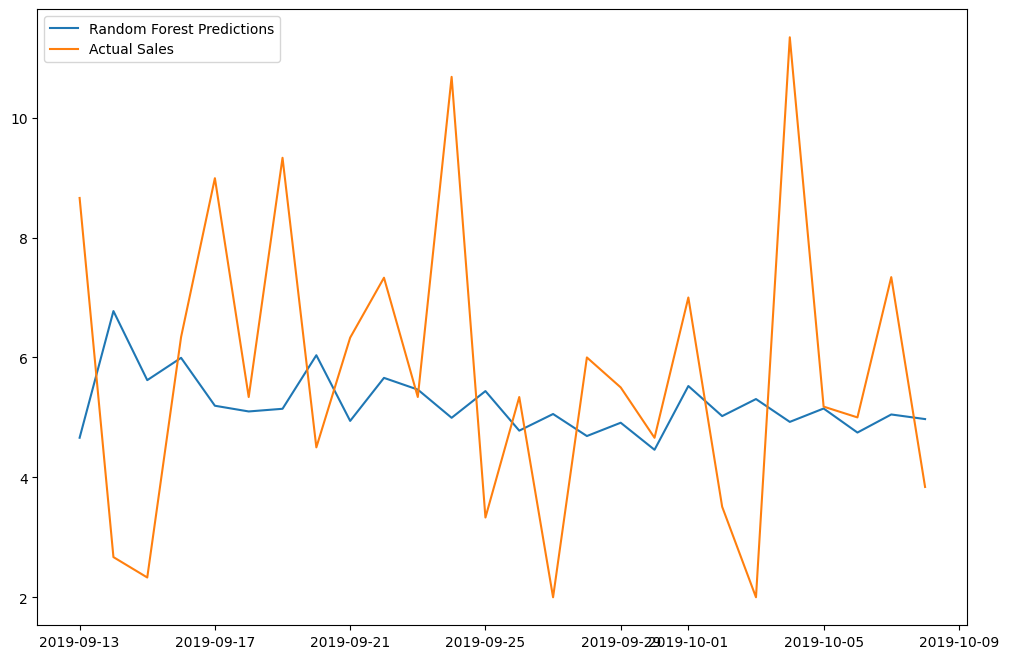

In [36]:
rforest_pred=rforest_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(dx,rforest_pred,label='Random Forest Predictions')
plt.plot(dx,y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

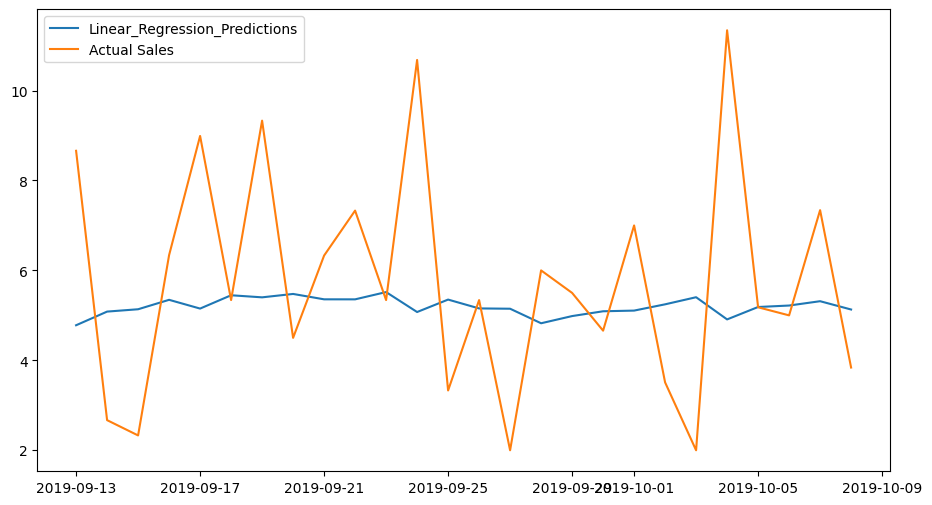

In [37]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(dx,lin_pred,label='Linear_Regression_Predictions')
plt.plot(dx,y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

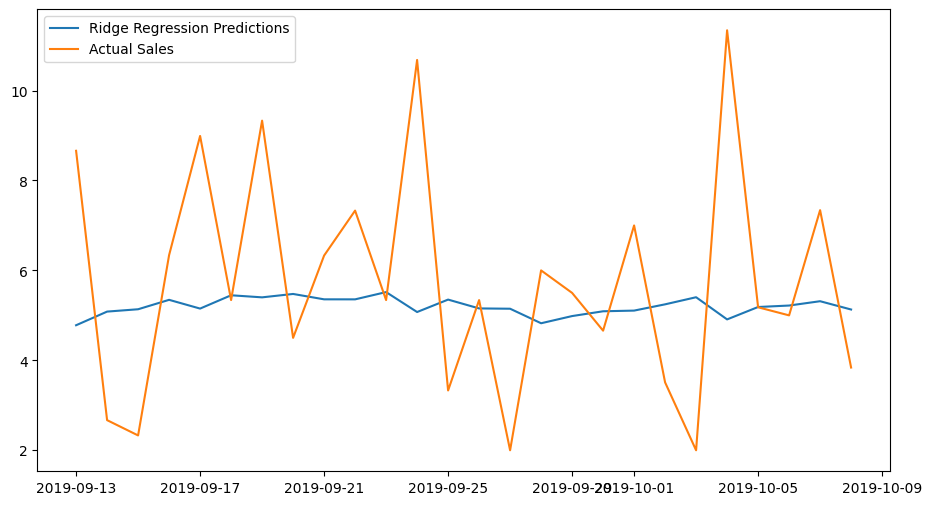

In [38]:
ridge_pred = ridge_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(dx,ridge_pred,label='Ridge Regression Predictions')
plt.plot(dx,y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

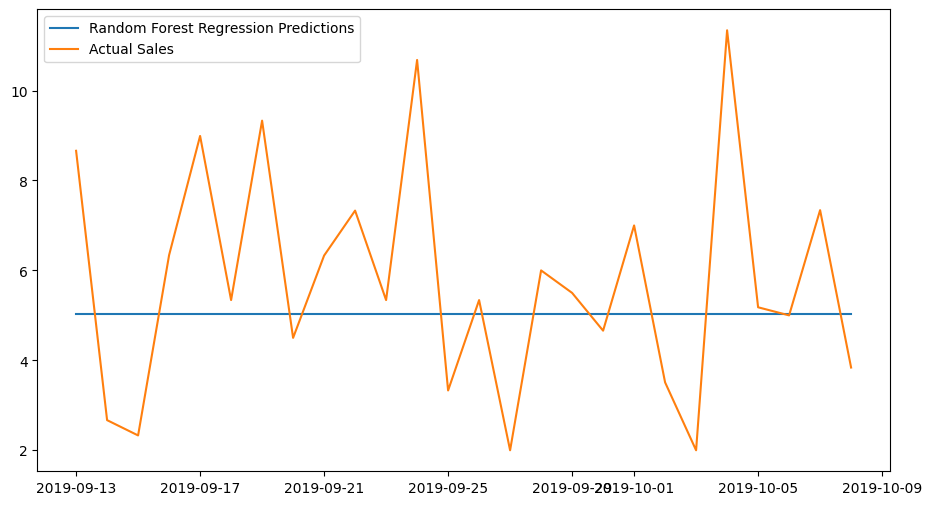

In [39]:
lasso_pred = lasso_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(dx,lasso_pred,label='Random Forest Regression Predictions')
plt.plot(dx,y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

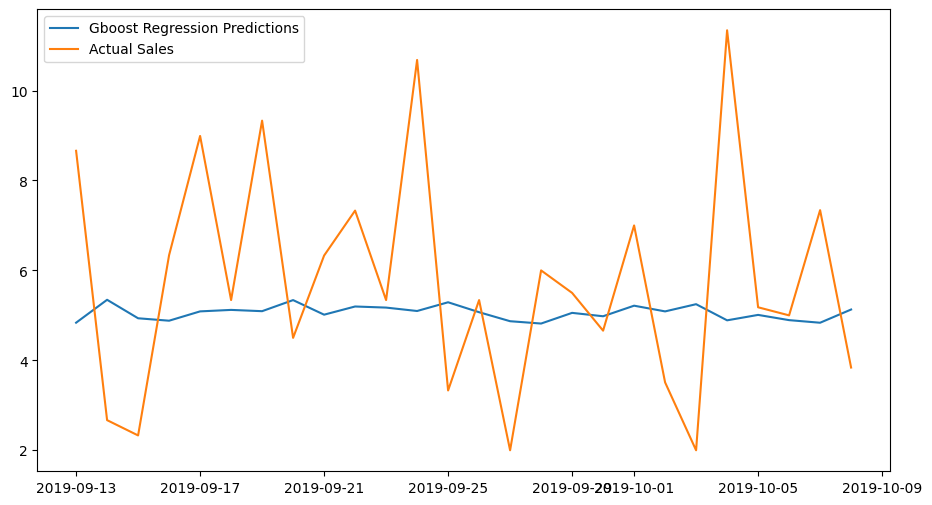

In [40]:
gboost_pred = gboost_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(dx,gboost_pred,label='Gboost Regression Predictions')
plt.plot(dx,y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

Creating a function to choose the best model based on Root Mean Squared Error

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def choosing_model(rforest_model,lin_model,ridge_model,gboost_model,lasso_model,X_train,y_train,X_test,y_test):
    

    rforest_model.fit(X_train, y_train.ravel())
    lin_model.fit(X_train,y_train)
    ridge_model.fit(X_train,y_train)
    gboost_model.fit(X_train,y_train.ravel())
    lasso_model.fit(X_train, y_train)

    rforest_pred=rforest_model.predict(X_test)
    lin_pred=lin_model.predict(X_test)
    ridge_pred = ridge_model.predict(X_test)
    lasso_pred = lasso_model.predict(X_test)
    gboost_pred = gboost_model.predict(X_test)

    rmse_rf=sqrt(mean_squared_error(rforest_pred,y_test))
    rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))
    rmse_gb=sqrt(mean_squared_error(gboost_pred,y_test))
    rmse_rd=sqrt(mean_squared_error(ridge_pred,y_test))
    rmse_rl=sqrt(mean_squared_error(lasso_pred,y_test))

    print('Root Mean Squared Error for Random Forest Regression Model is:',rmse_rf)
    print('Root Mean Squared Error for Linear Regression Model is:',rmse_lr)
    print('Root Mean Squared Error for Gradient Forest Regression Model is:',rmse_gb)
    print('Root Mean Squared Error for Lasso Regression Model is:',rmse_rl)
    print('Root Mean Squared Error for Ridge Regression Model is:',rmse_rd)

    rmse_values = {'Random Forest': rmse_rf, 'Linear Regression': rmse_lr, 'Gradient Boosting': rmse_gb, 'Ridge Regression': rmse_rd, 'Lasso Regression': rmse_rl}
    models = {'Random Forest': rforest_model, 'Linear Regression': lin_model, 'Gradient Boosting': gboost_model, 'Ridge Regression': ridge_model, 'Lasso Regression': lasso_model}
    best_model_name = min(rmse_values, key=rmse_values.get)
    best_model = models[best_model_name]
    best_rmse = rmse_values[best_model_name]
    print(f'The best model is: {best_model_name} with RMSE: {best_rmse}')
    return best_model,best_model_name

Visualising the results regaring sales of __M01AB__ drug after choosing the best model

Root Mean Squared Error for Random Forest Regression Model is: 2.79284692098745
Root Mean Squared Error for Linear Regression Model is: 2.619288784692426
Root Mean Squared Error for Gradient Forest Regression Model is: 2.6439976339592204
Root Mean Squared Error for Lasso Regression Model is: 2.6075454611206346
Root Mean Squared Error for Ridge Regression Model is: 2.6192773391484634
The best model is: Lasso Regression with RMSE: 2.6075454611206346


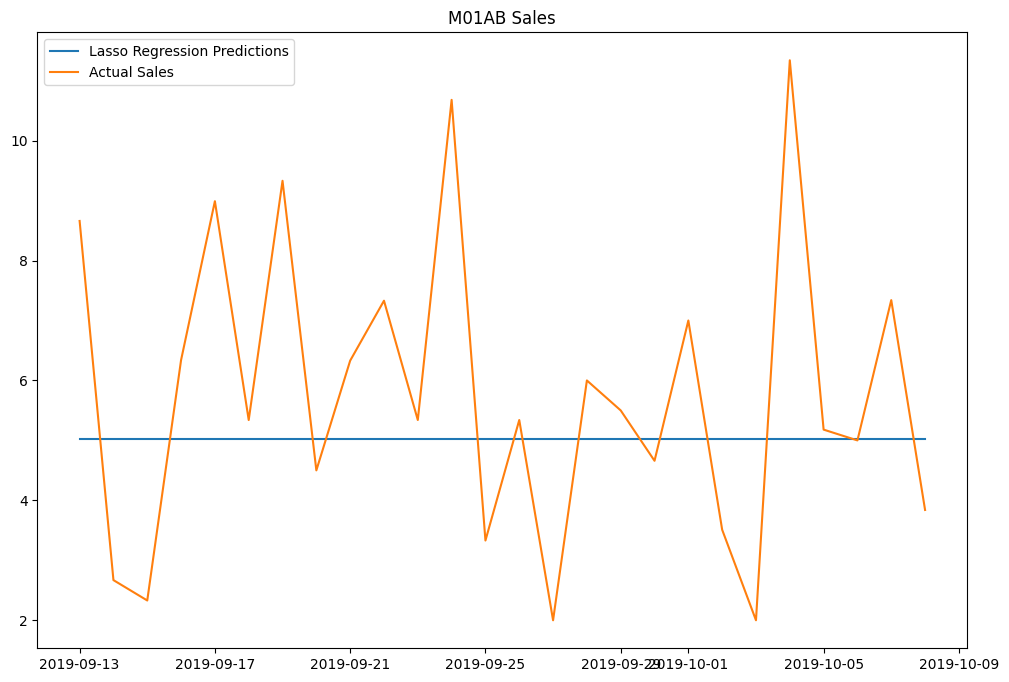

In [42]:
best_model,best_model_name = choosing_model(rforest_model,lin_model,ridge_model,gboost_model,lasso_model,X_train,y_train,X_test,y_test)
best_pred = best_model.predict(X_test)
plt.rcParams["figure.figsize"] = (12,8)
plt.title("M01AB Sales")
plt.plot(dx,best_pred,label= best_model_name+' Predictions')
plt.plot(dx,y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [43]:
def predict_future_sales(model, features, start_date, end_date):
    prediction_dates = pd.date_range(start=start_date, end=end_date, freq='D')

    predictions_df = pd.DataFrame(index=prediction_dates, columns=['Predicted_Sale'])

    for date in prediction_dates:
        try:
            current_features = features.loc[date]

            if current_features.isna().any():
                continue

            current_features = current_features.values.reshape(1, -1)

            predicted_sale = model.predict(current_features)

            predictions_df.loc[date, 'Predicted_Sale'] = predicted_sale[0]
        except KeyError:
            continue

    return predictions_df


# Future Forecast of __M01AB__ Drug from 9/10/2019 to 9/10/2023

Printing the corresponding sales with the dates

In [44]:
from datetime import datetime, timedelta

start_date = datetime(2019, 9, 10)
end_date = datetime(2023, 9, 10)
features = df_daily_m1[['Sale_LastDay', 'Sale_2Daysback', 'Sale_3Daysback', 'Sale_FutureDay', 'Sale_2Daysafter', 'Sale_3Daysafter', 'Month', 'Weekday Name']]
predictions = predict_future_sales(best_model, features, start_date, end_date)

print(predictions)

           Predicted_Sale
2019-09-10       5.028634
2019-09-11       5.028634
2019-09-12       5.028634
2019-09-13       5.028634
2019-09-14       5.028634
...                   ...
2023-09-06            NaN
2023-09-07            NaN
2023-09-08            NaN
2023-09-09            NaN
2023-09-10            NaN

[1462 rows x 1 columns]


Visualising the corresponding sales with the dates

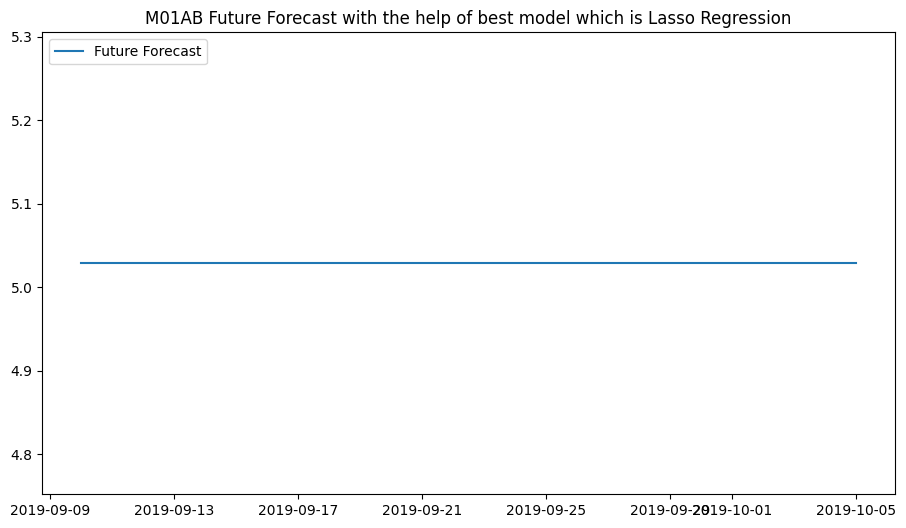

In [45]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.title("M01AB Future Forecast with the help of best model which is "+best_model_name)
plt.plot(predictions,label='Future Forecast')
plt.legend(loc="upper left")
plt.show()

# Iteratively visualizing the sales data of all the drugs with all the combined methods and processes that was shown above

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
Best parameters for Lasso: {'alpha': 1}
Best parameters for Ridge: {'alpha': 10}
Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True}
Best parameters for RandomForestRegressor: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


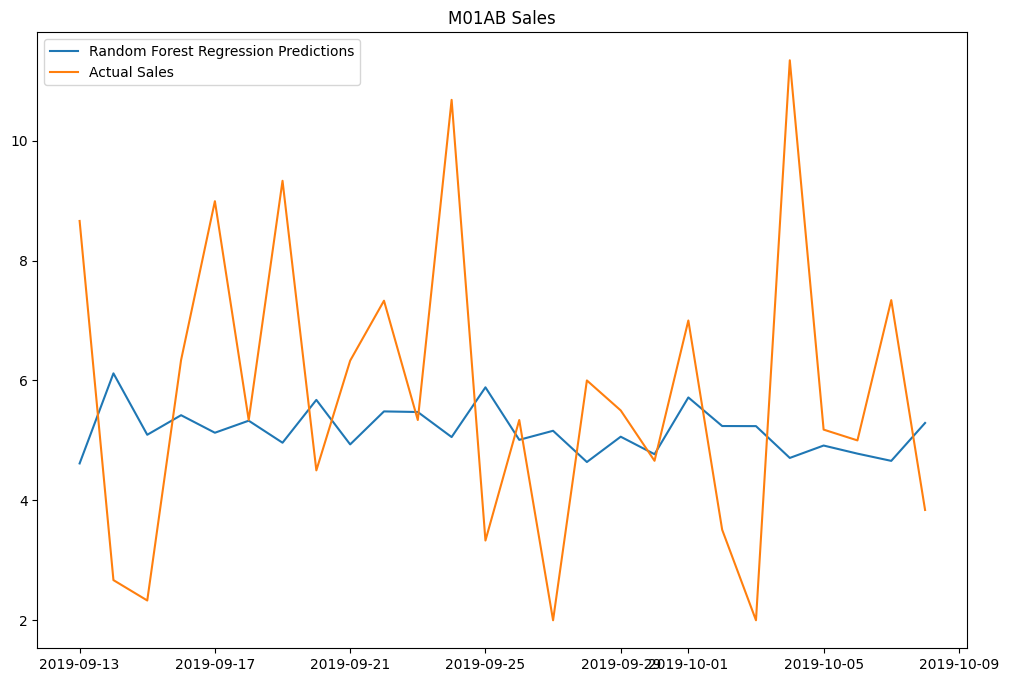

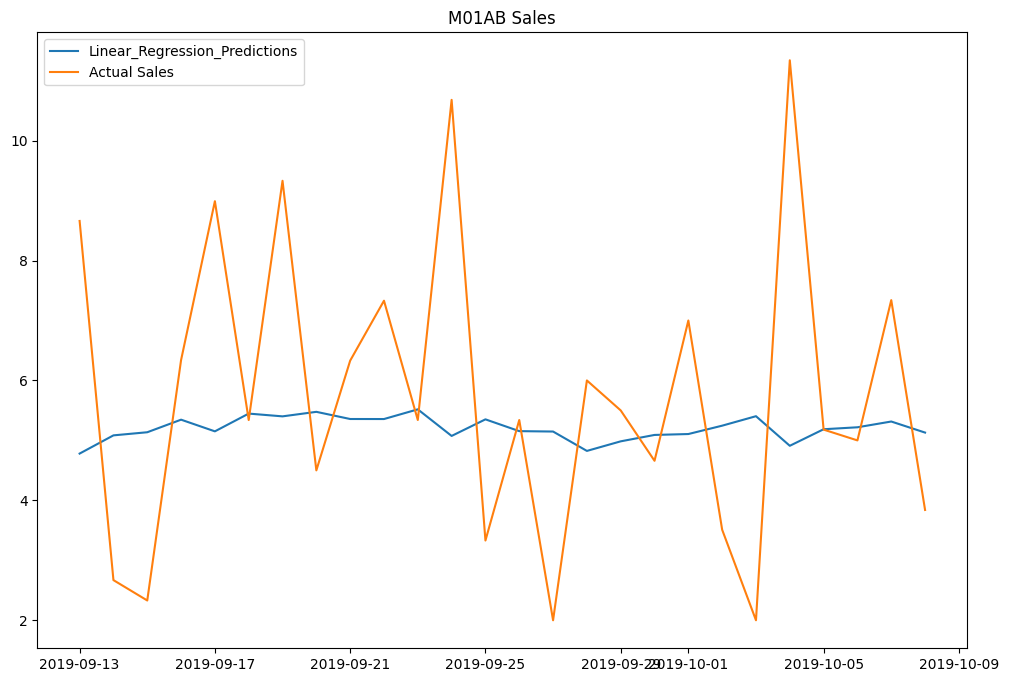

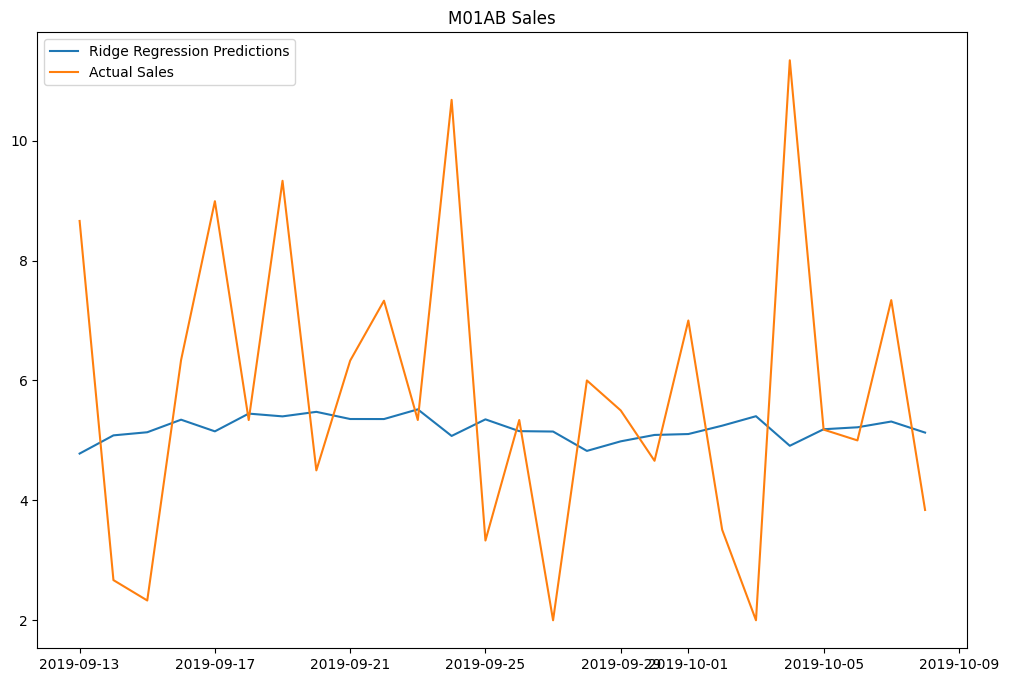

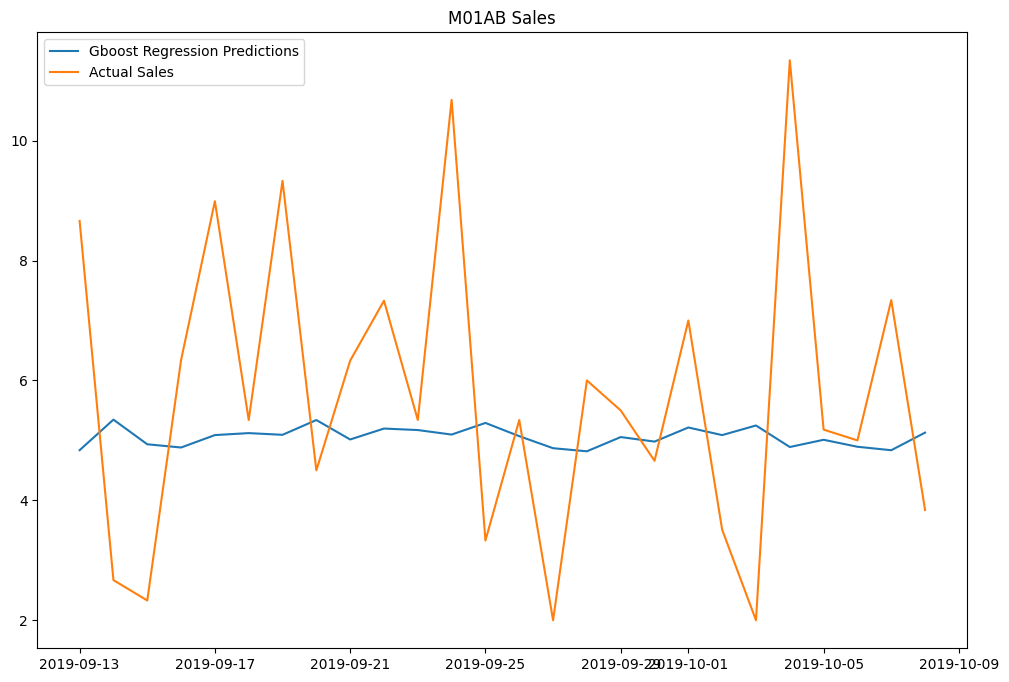

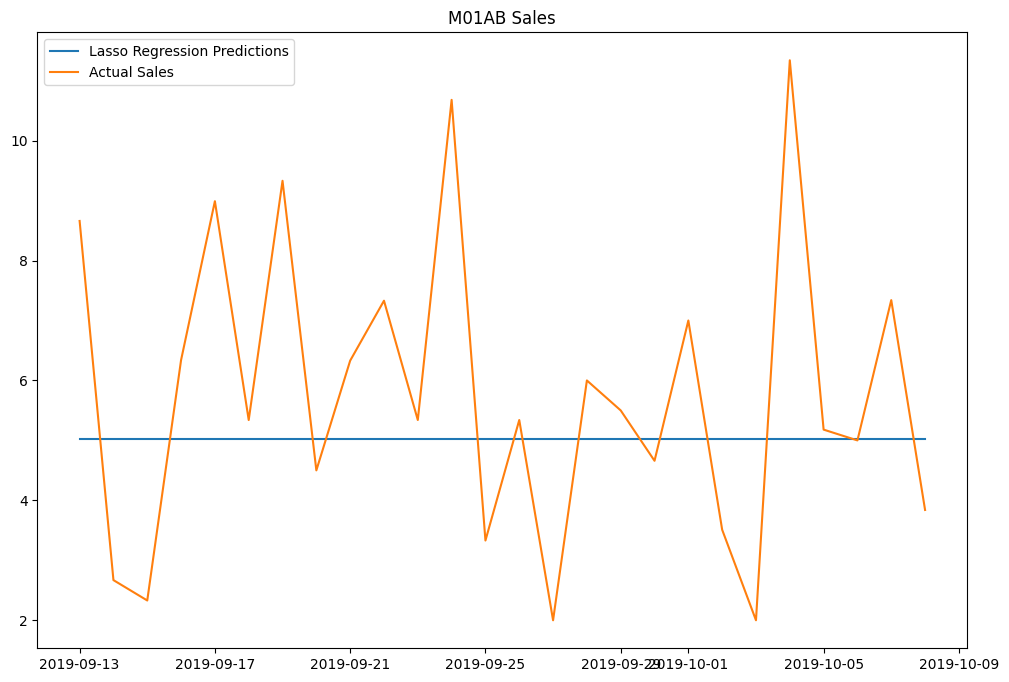

Root Mean Squared Error for Random Forest Regression Model is: 2.7451532048526888
Root Mean Squared Error for Linear Regression Model is: 2.619288784692426
Root Mean Squared Error for Gradient Forest Regression Model is: 2.643998125750762
Root Mean Squared Error for Lasso Regression Model is: 2.6075454611206346
Root Mean Squared Error for Ridge Regression Model is: 2.6192773391484634
The best model is: Lasso Regression with RMSE: 2.6075454611206346


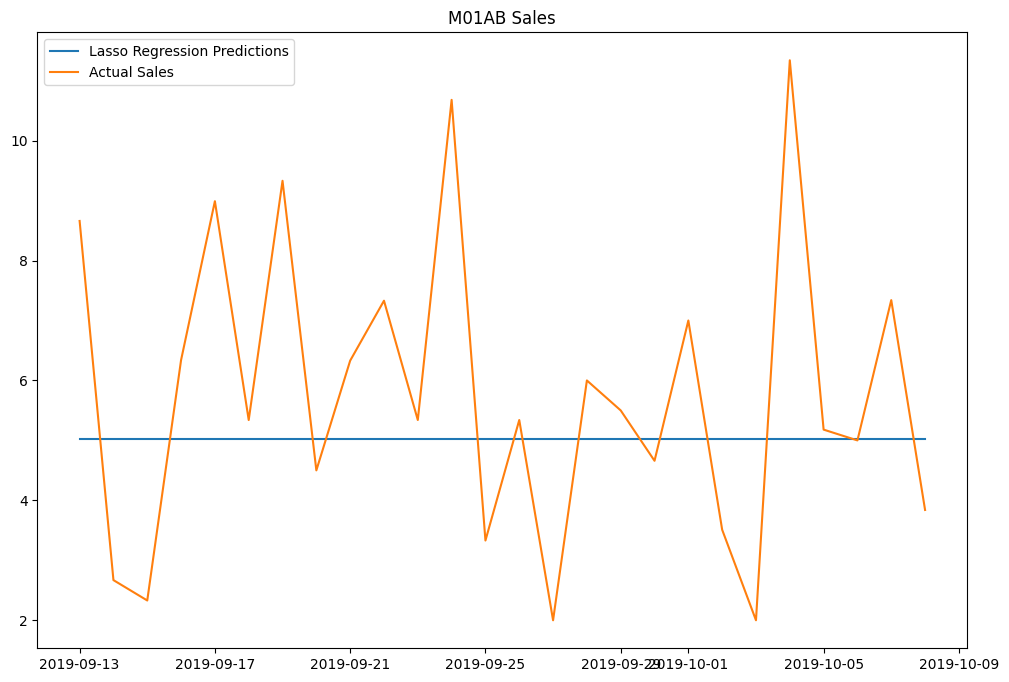

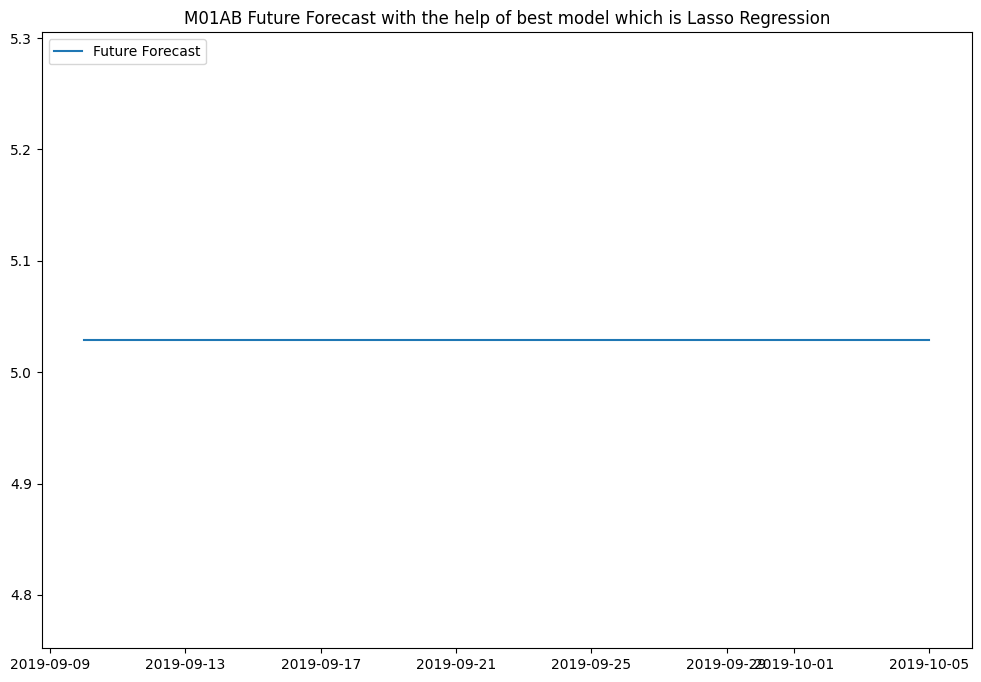

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best parameters for Lasso: {'alpha': 0.01}
Best parameters for Ridge: {'alpha': 10}
Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True}
Best parameters for RandomForestRegressor: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


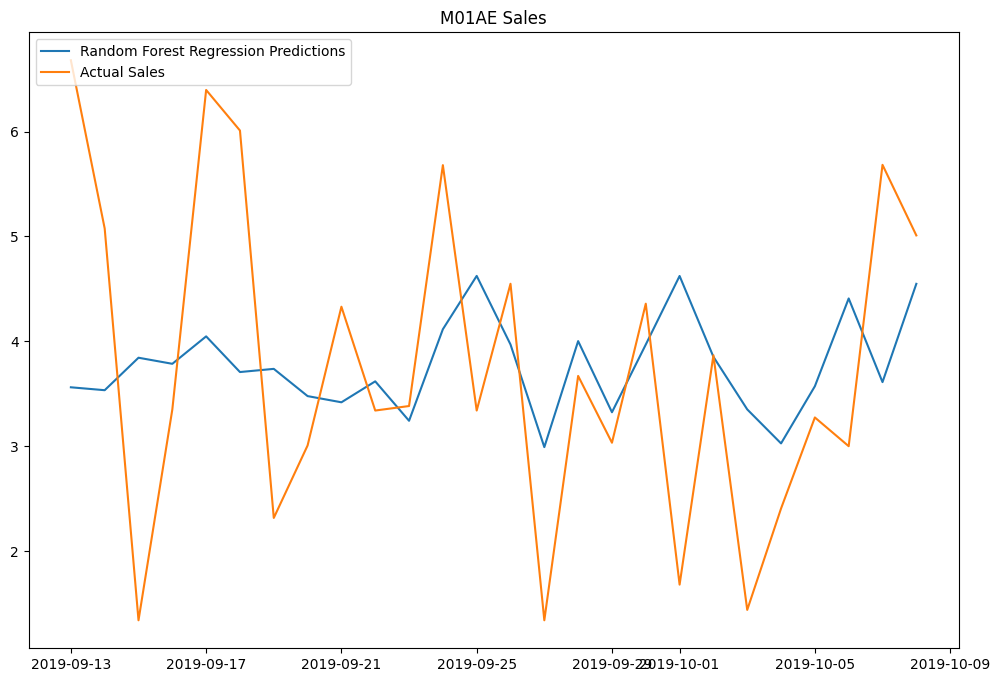

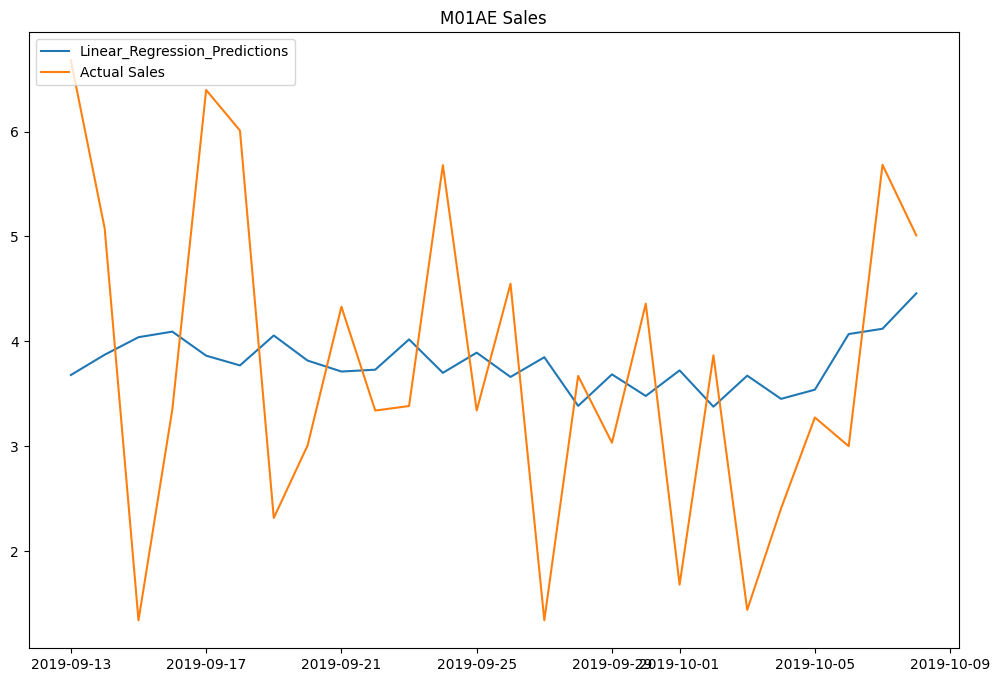

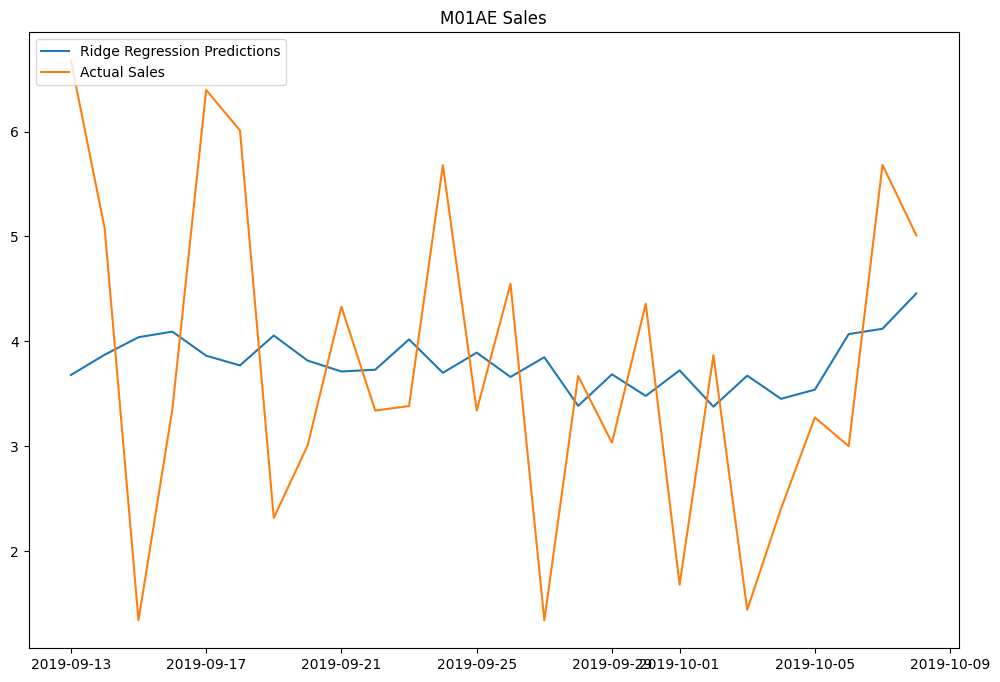

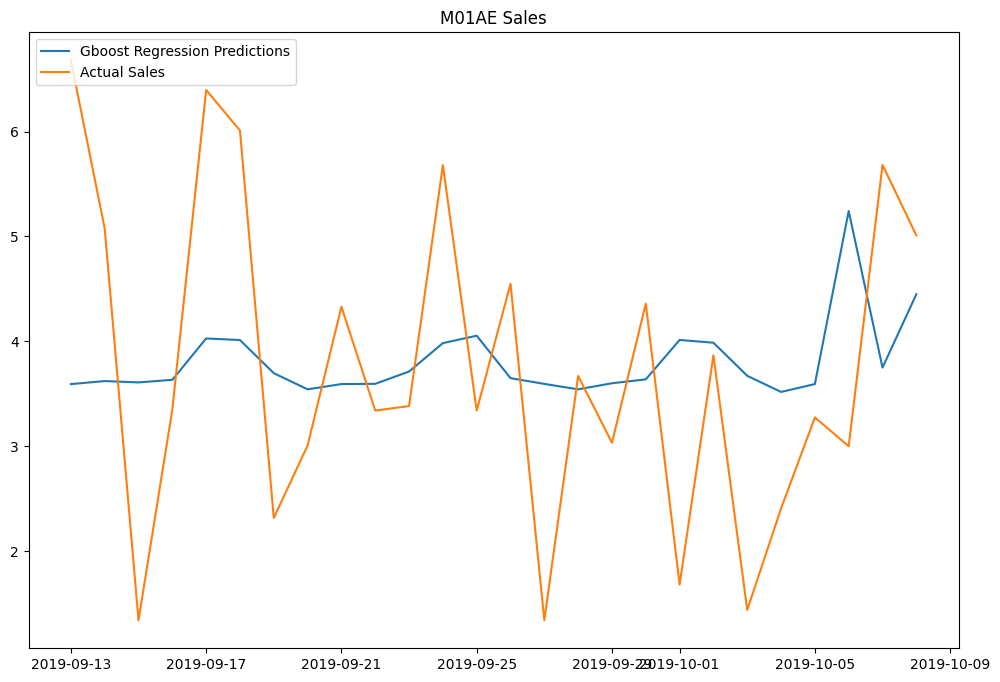

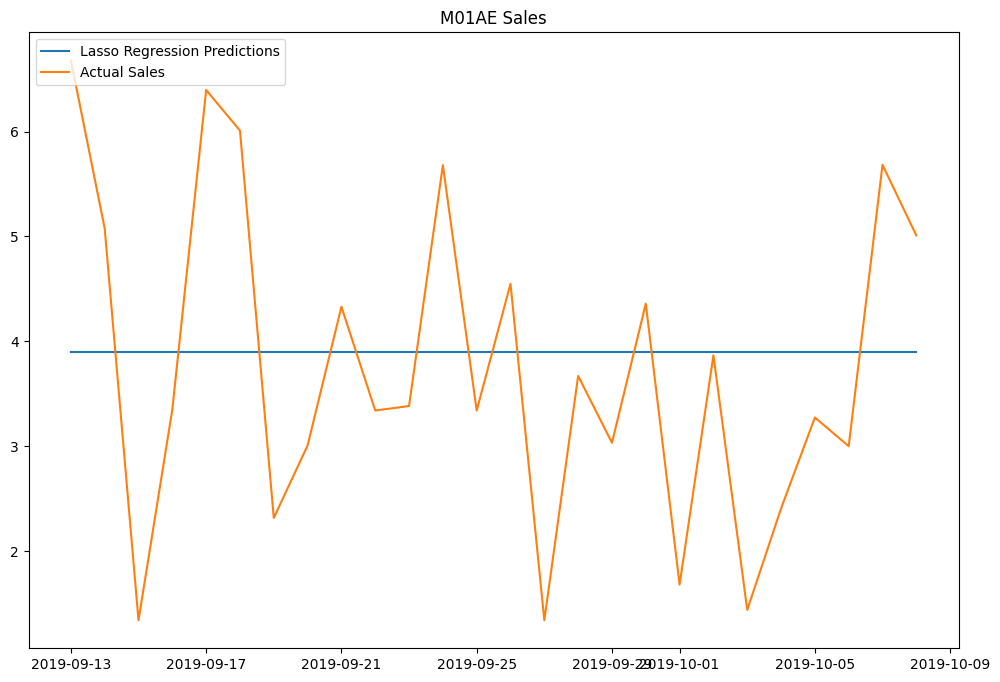

Root Mean Squared Error for Random Forest Regression Model is: 1.4769735595445954
Root Mean Squared Error for Linear Regression Model is: 1.5366717839999435
Root Mean Squared Error for Gradient Forest Regression Model is: 1.5240167246969498
Root Mean Squared Error for Lasso Regression Model is: 1.5317200092916239
Root Mean Squared Error for Ridge Regression Model is: 1.5366490395507397
The best model is: Random Forest with RMSE: 1.4769735595445954


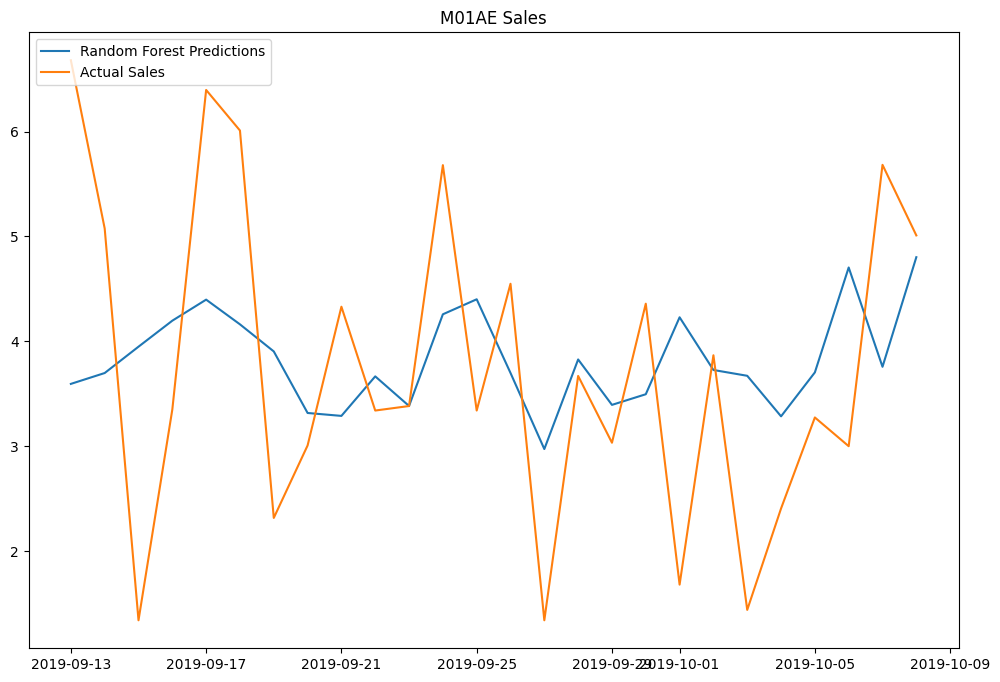

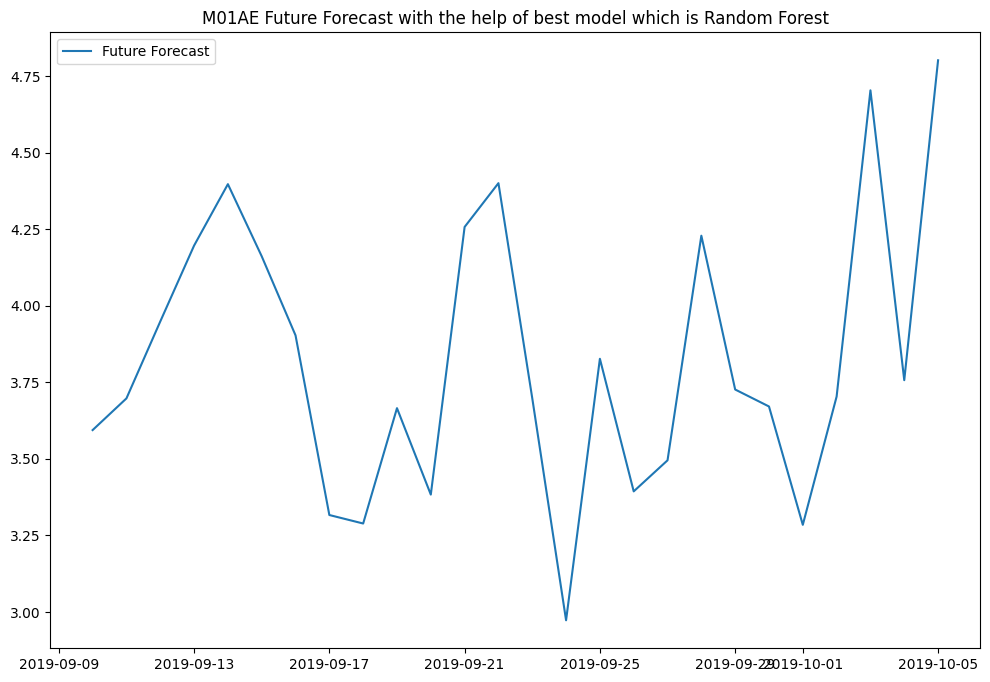

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best parameters for Lasso: {'alpha': 0.01}
Best parameters for Ridge: {'alpha': 10}
Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True}
Best parameters for RandomForestRegressor: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


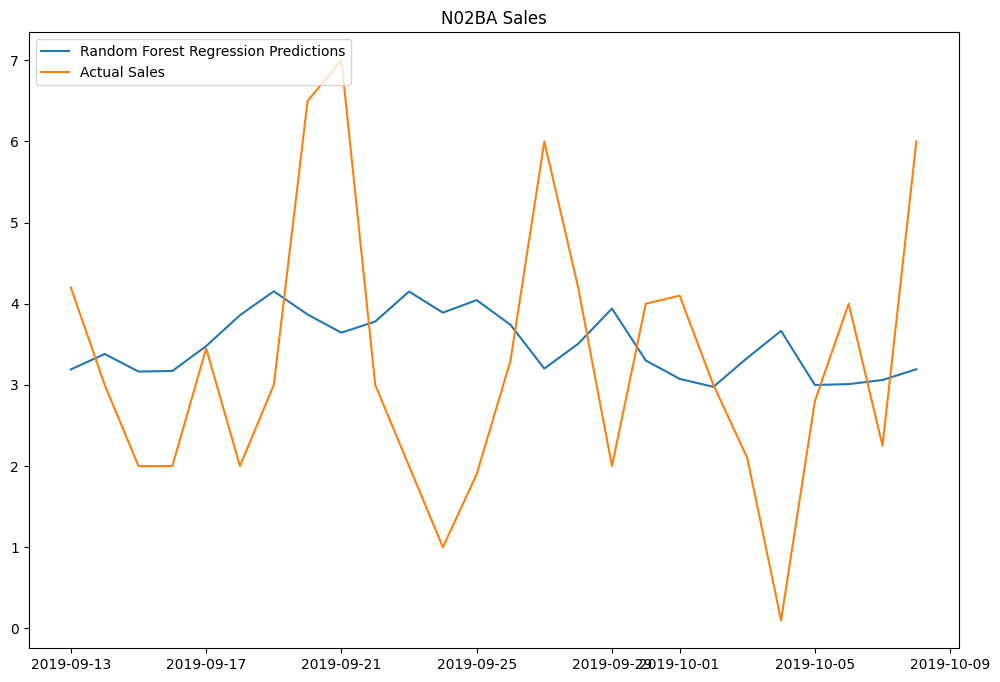

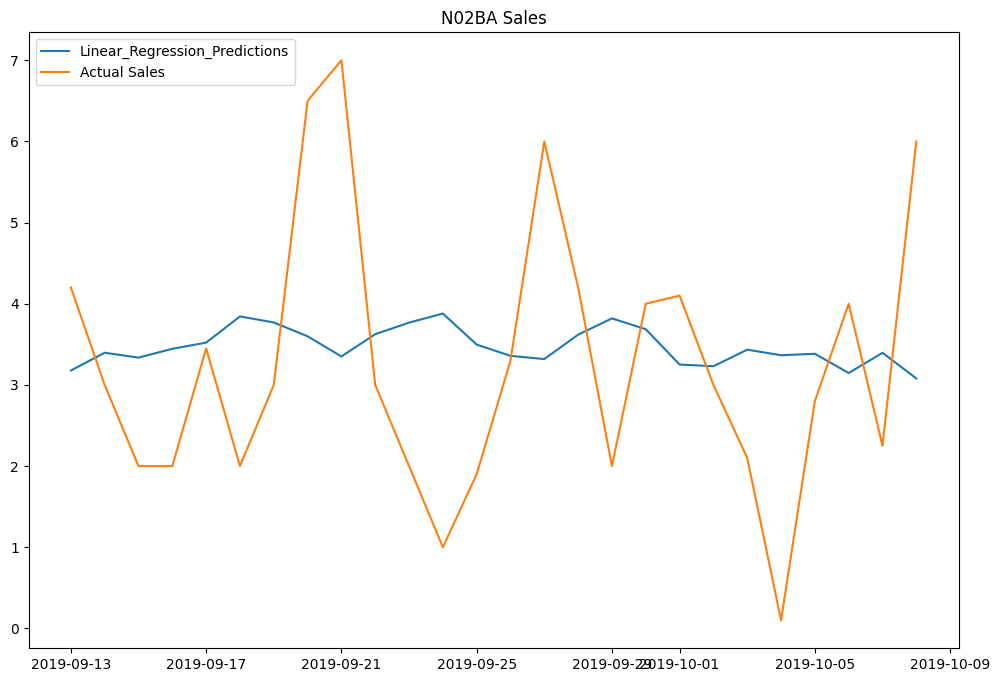

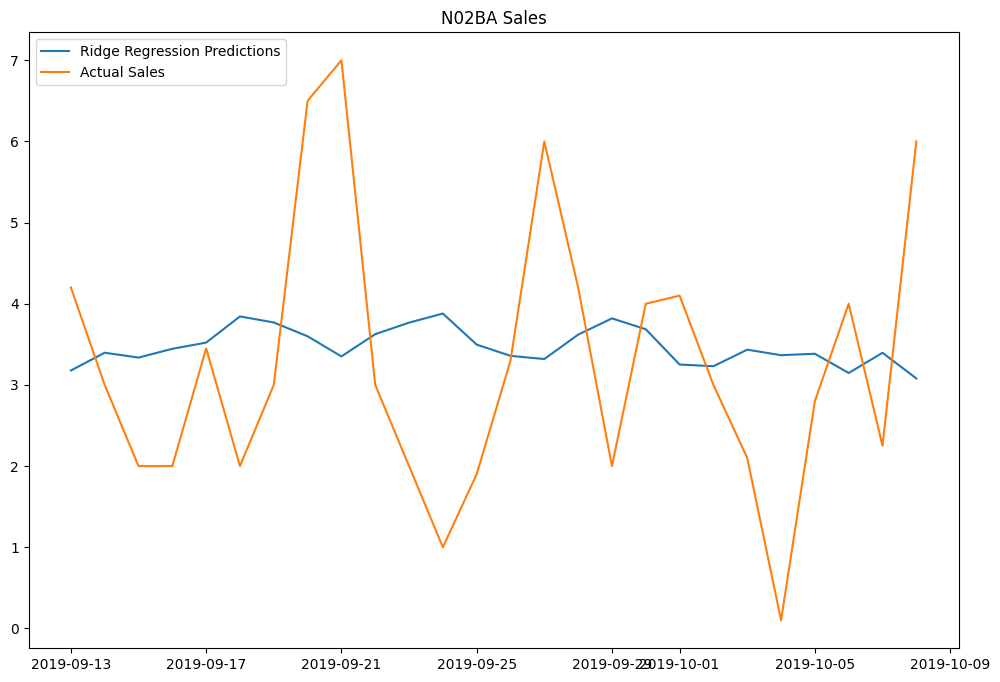

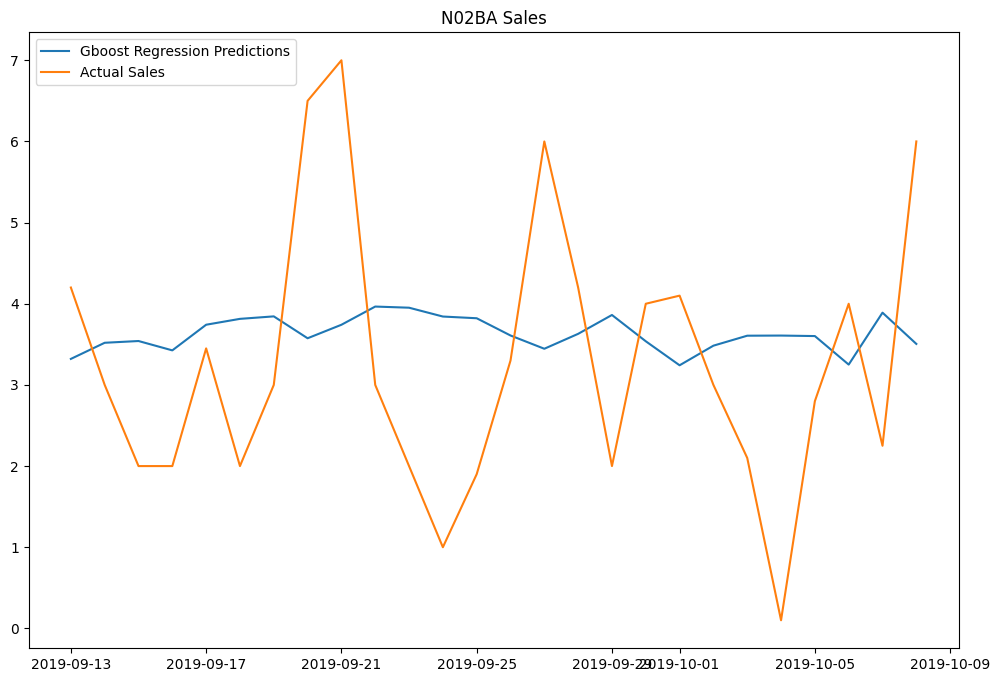

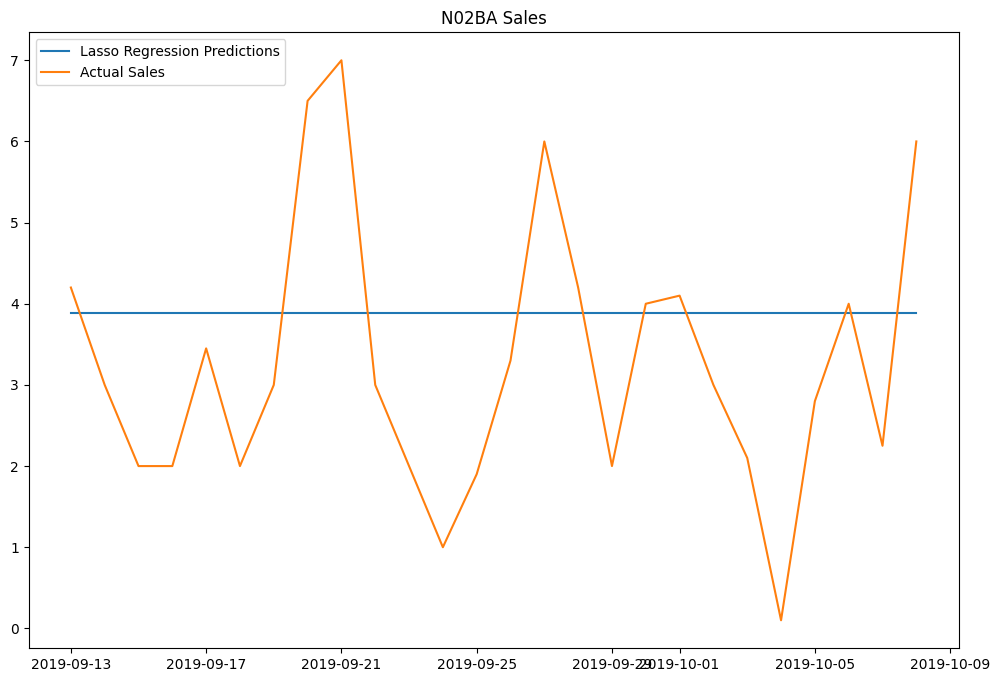

Root Mean Squared Error for Random Forest Regression Model is: 1.789878848056609
Root Mean Squared Error for Linear Regression Model is: 1.7566624981285048
Root Mean Squared Error for Gradient Forest Regression Model is: 1.7706716856563083
Root Mean Squared Error for Lasso Regression Model is: 1.7647412524261499
Root Mean Squared Error for Ridge Regression Model is: 1.756618745003341
The best model is: Ridge Regression with RMSE: 1.756618745003341


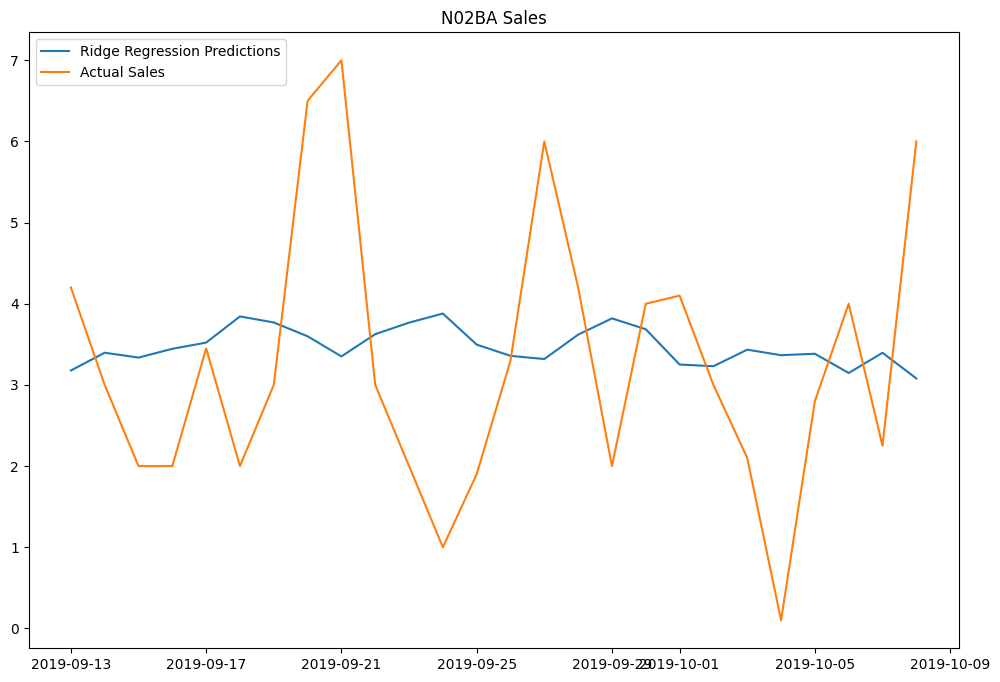

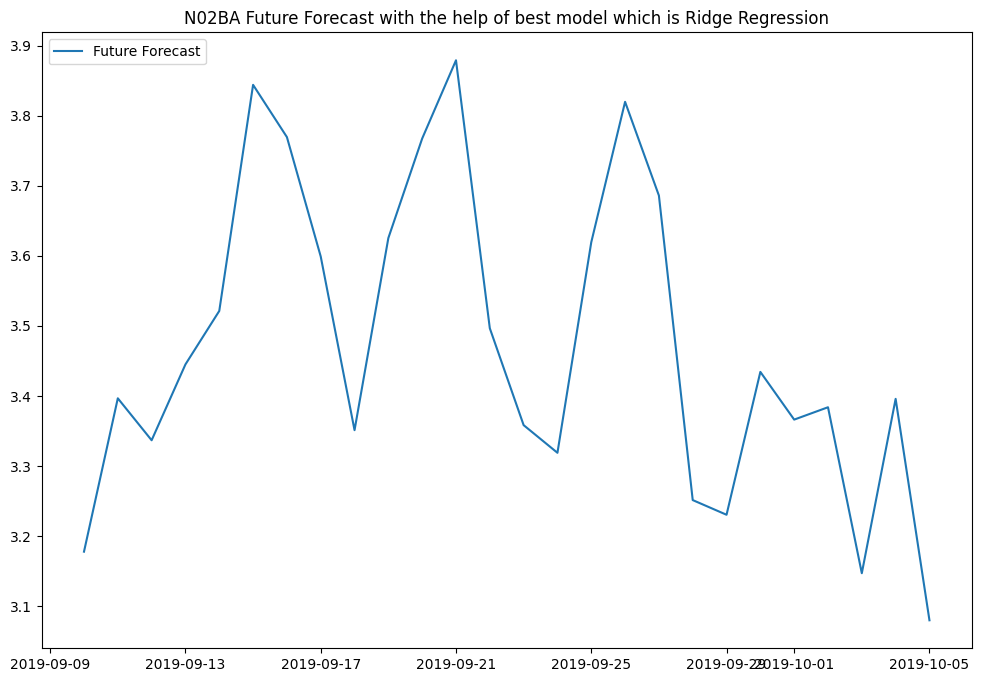

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best parameters for Lasso: {'alpha': 0.1}
Best parameters for Ridge: {'alpha': 10}
Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True}
Best parameters for RandomForestRegressor: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


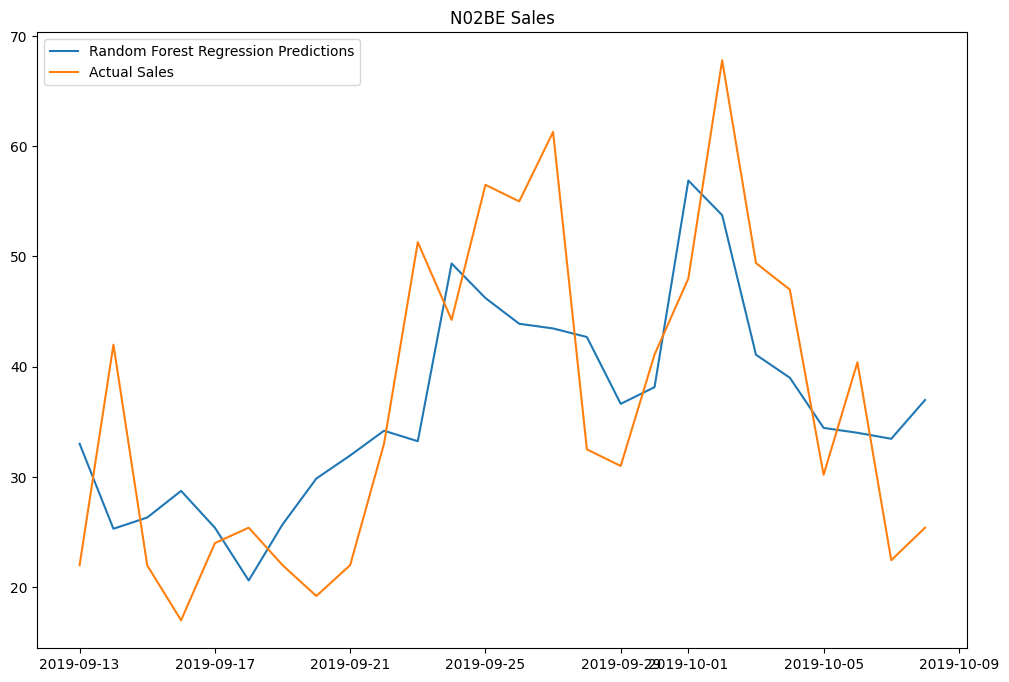

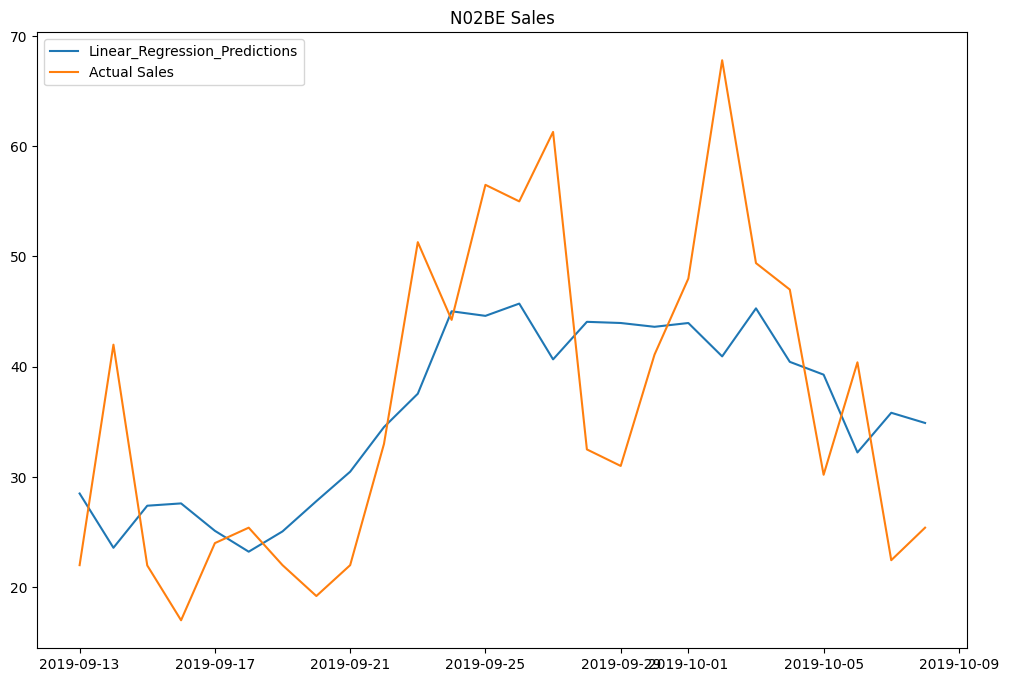

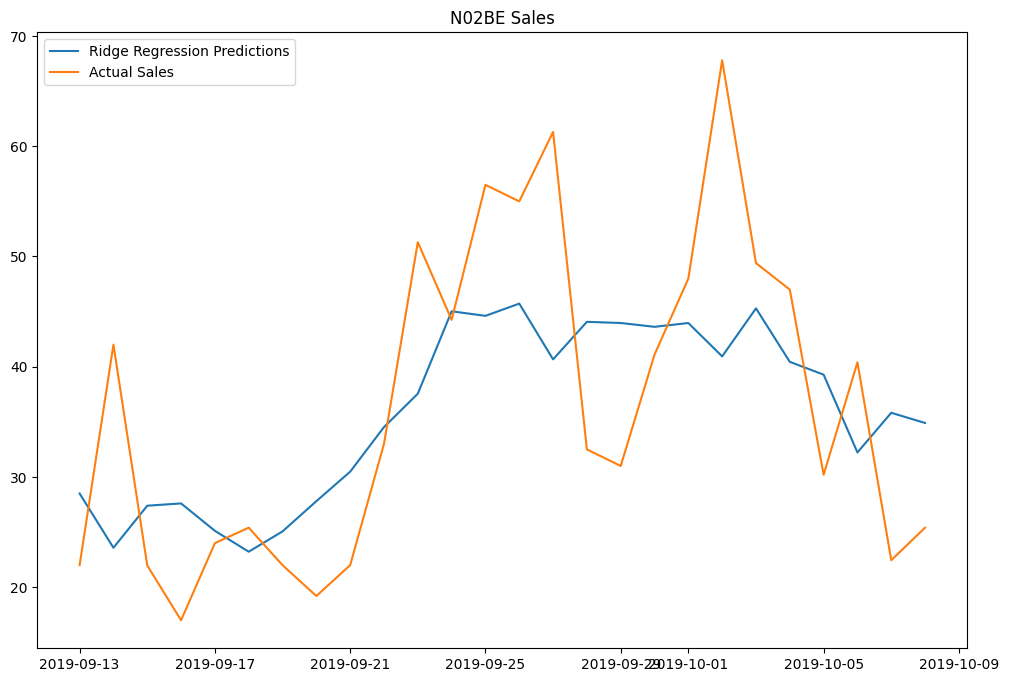

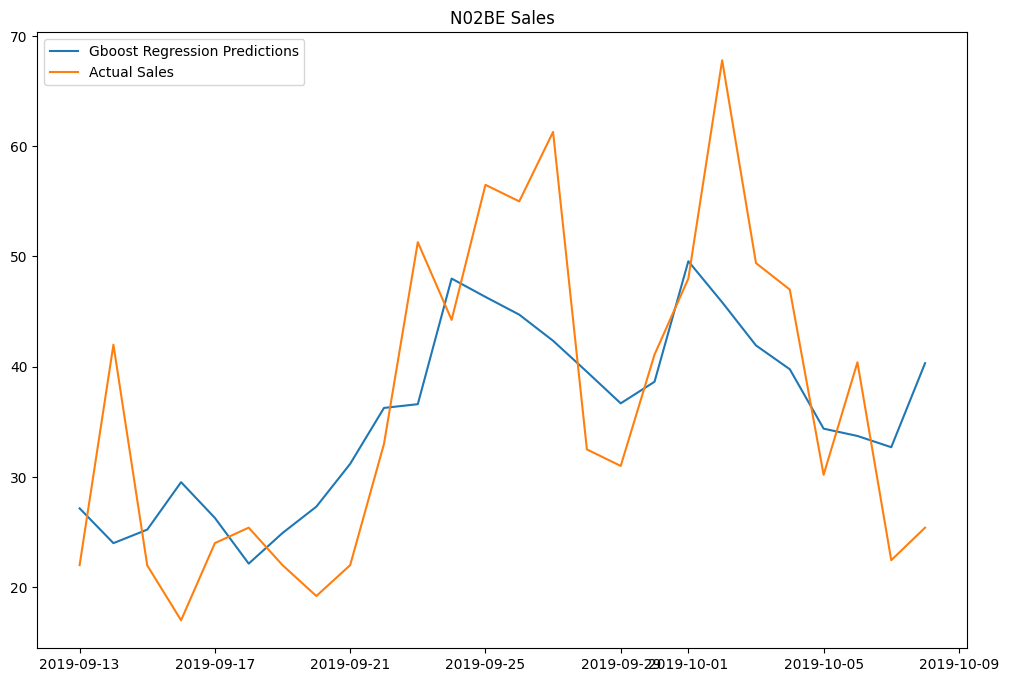

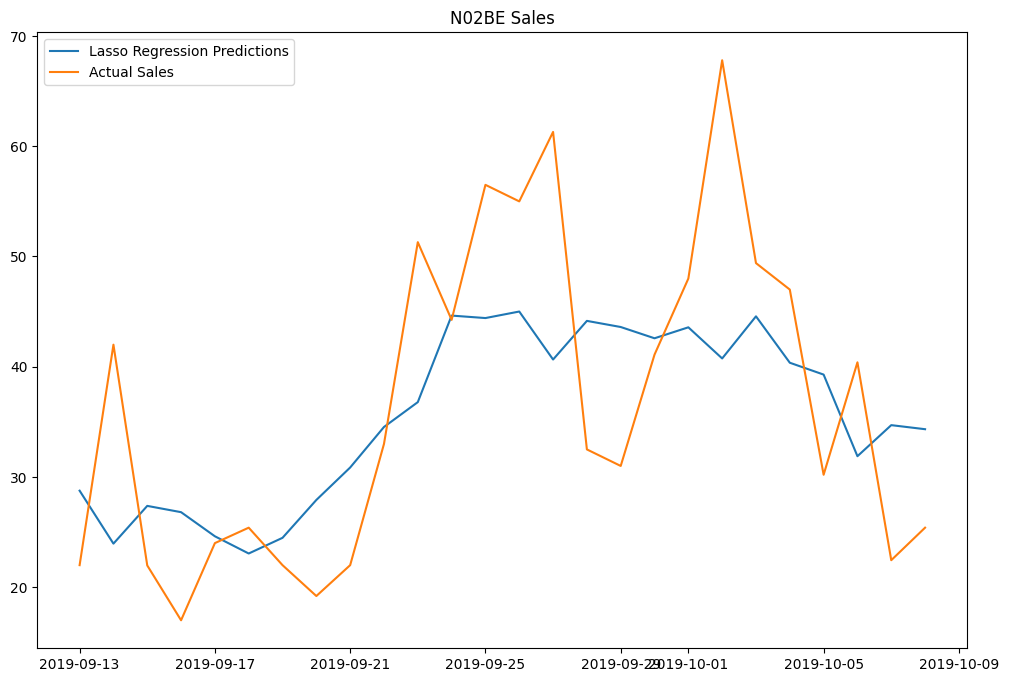

Root Mean Squared Error for Random Forest Regression Model is: 9.5786484145888
Root Mean Squared Error for Linear Regression Model is: 10.838078334550207
Root Mean Squared Error for Gradient Forest Regression Model is: 9.944901942349825
Root Mean Squared Error for Lasso Regression Model is: 10.828948554166322
Root Mean Squared Error for Ridge Regression Model is: 10.838055588124195
The best model is: Random Forest with RMSE: 9.5786484145888


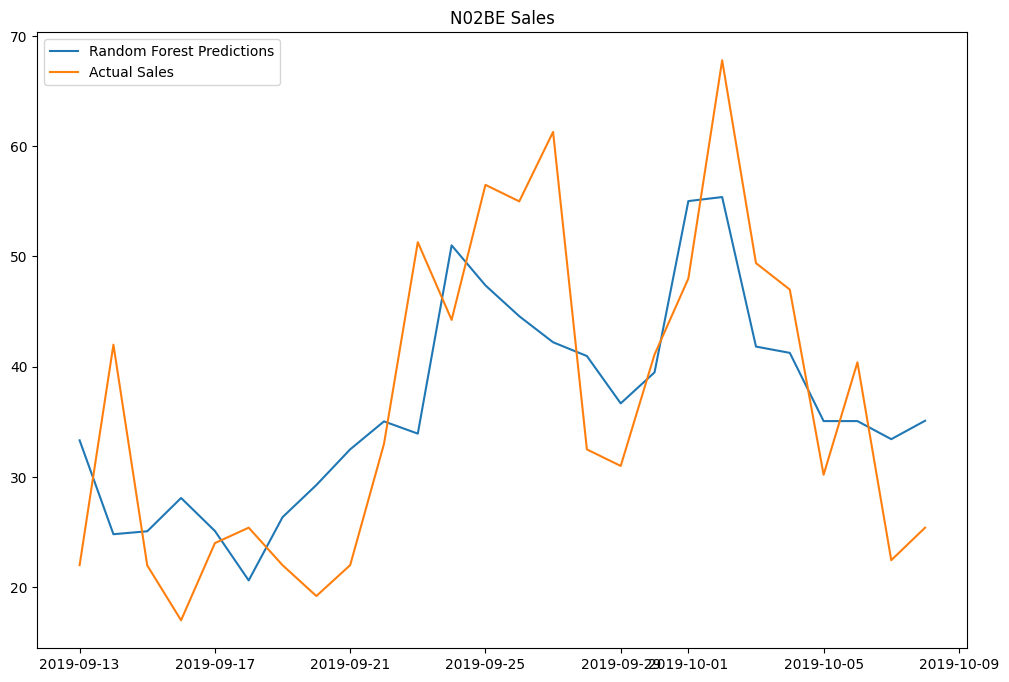

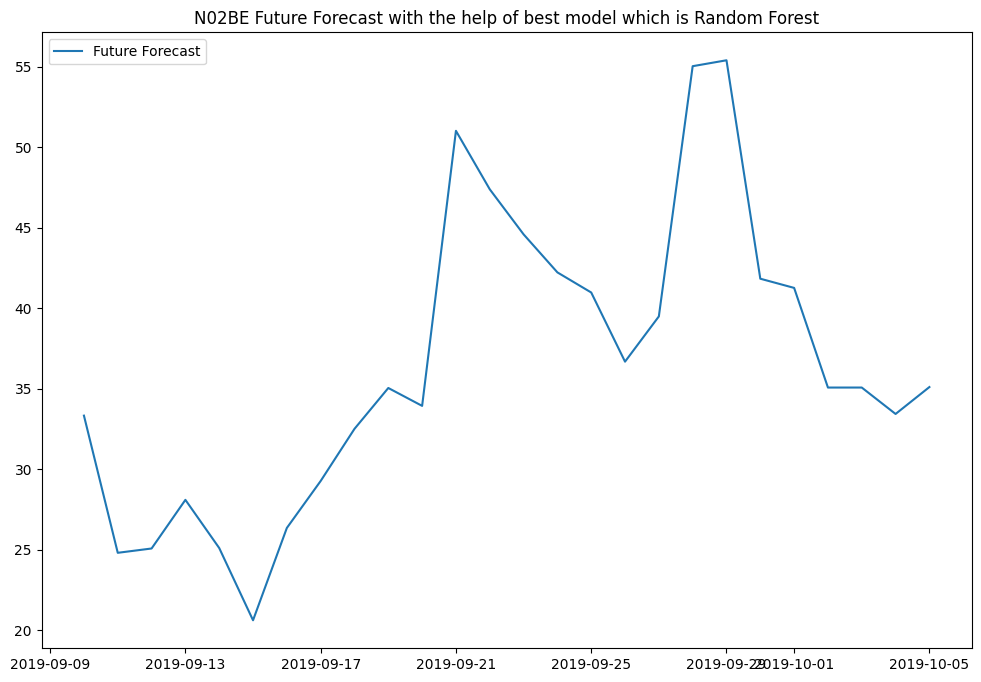

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best parameters for Lasso: {'alpha': 0.01}
Best parameters for Ridge: {'alpha': 10}
Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True}
Best parameters for RandomForestRegressor: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


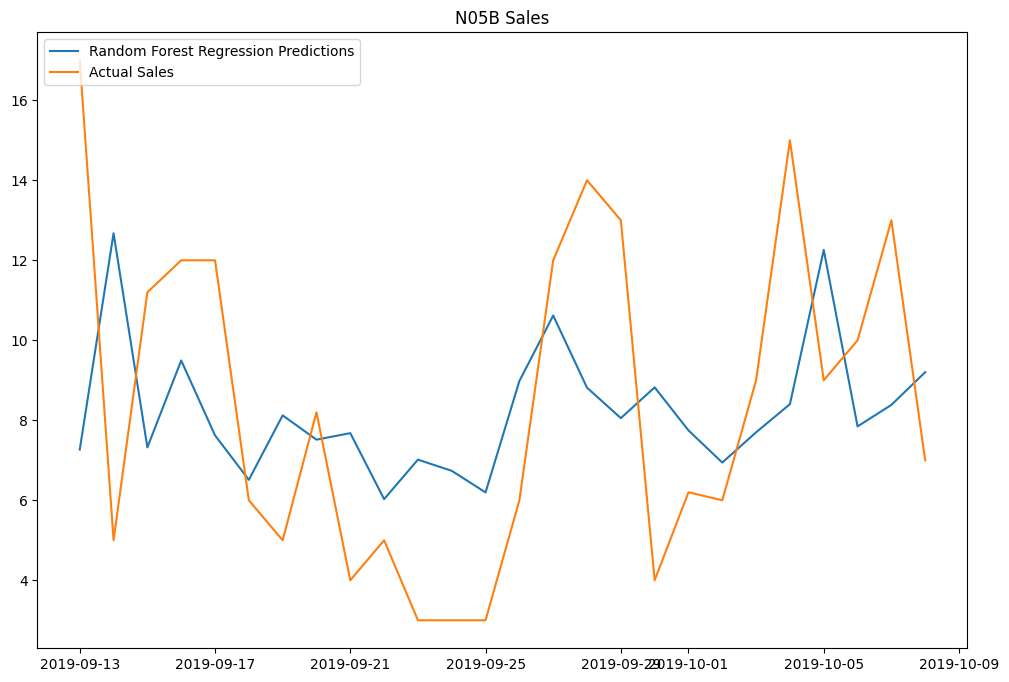

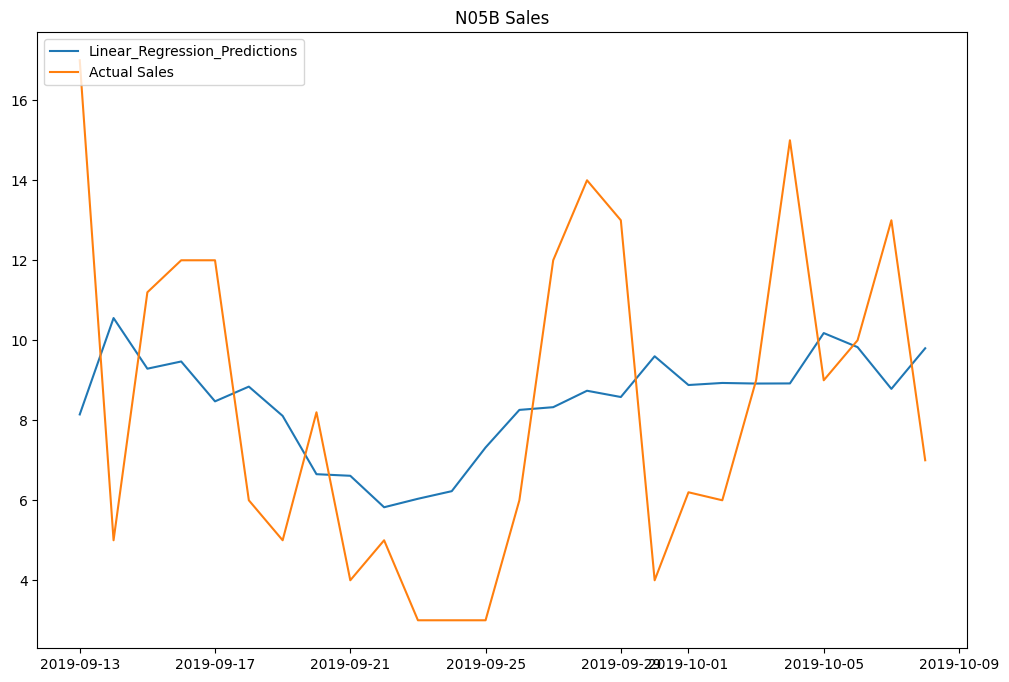

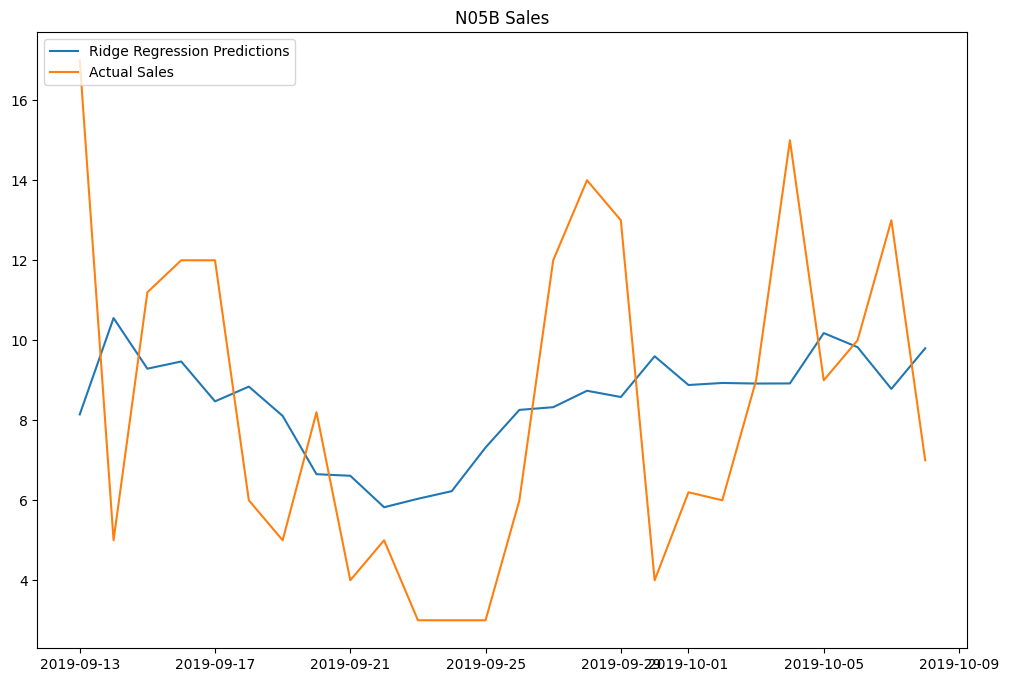

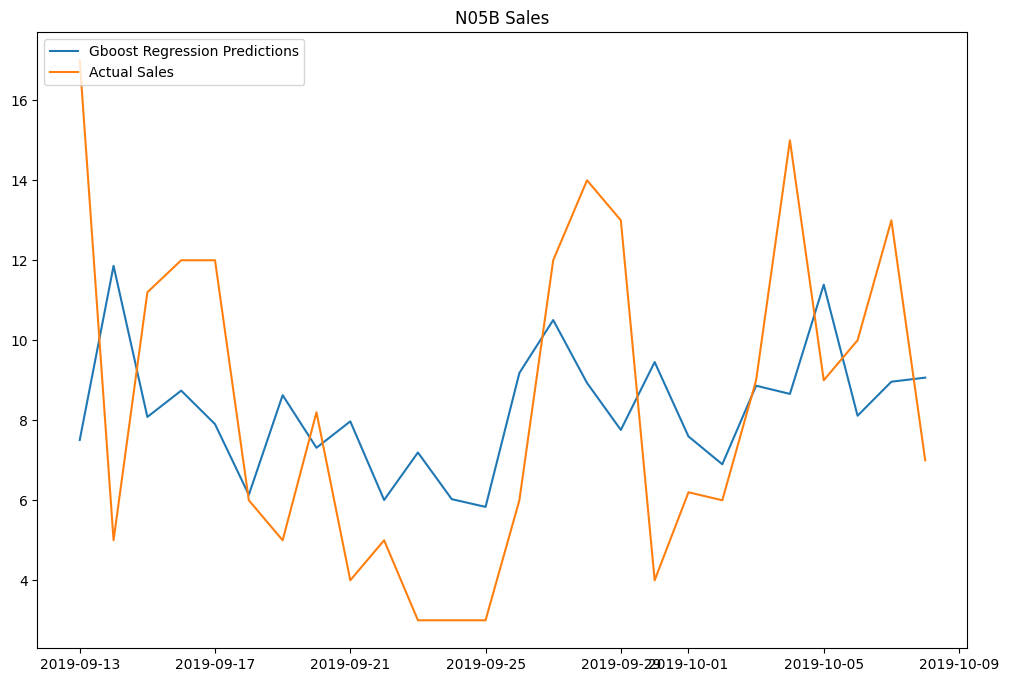

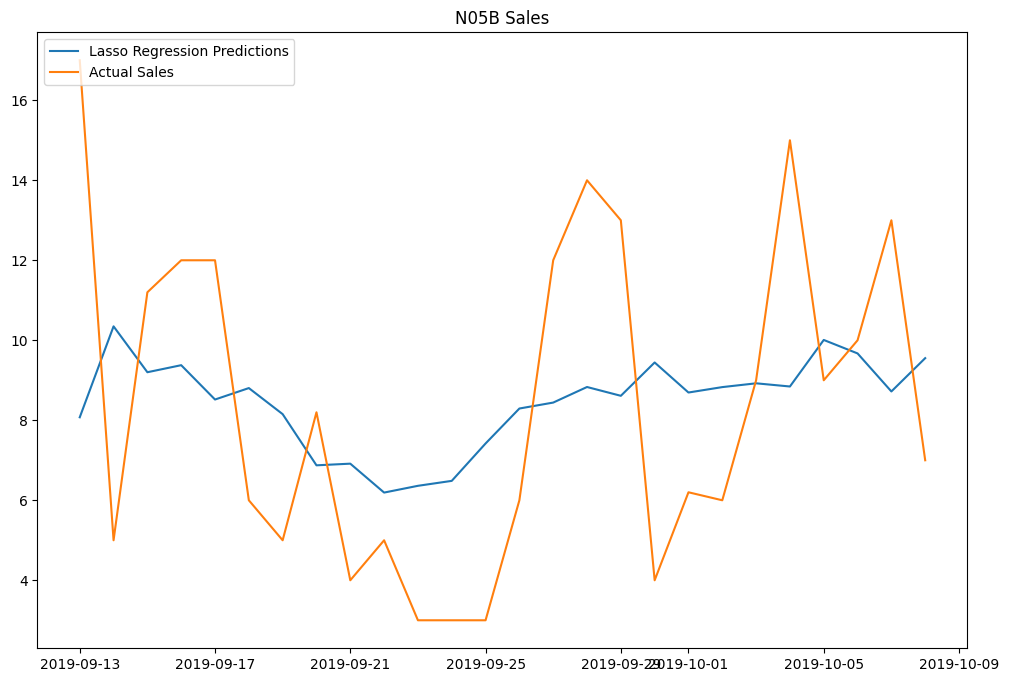

Root Mean Squared Error for Random Forest Regression Model is: 4.112831267997228
Root Mean Squared Error for Linear Regression Model is: 3.795976517194749
Root Mean Squared Error for Gradient Forest Regression Model is: 3.9609535637595057
Root Mean Squared Error for Lasso Regression Model is: 3.799481415150997
Root Mean Squared Error for Ridge Regression Model is: 3.795983841404442
The best model is: Linear Regression with RMSE: 3.795976517194749


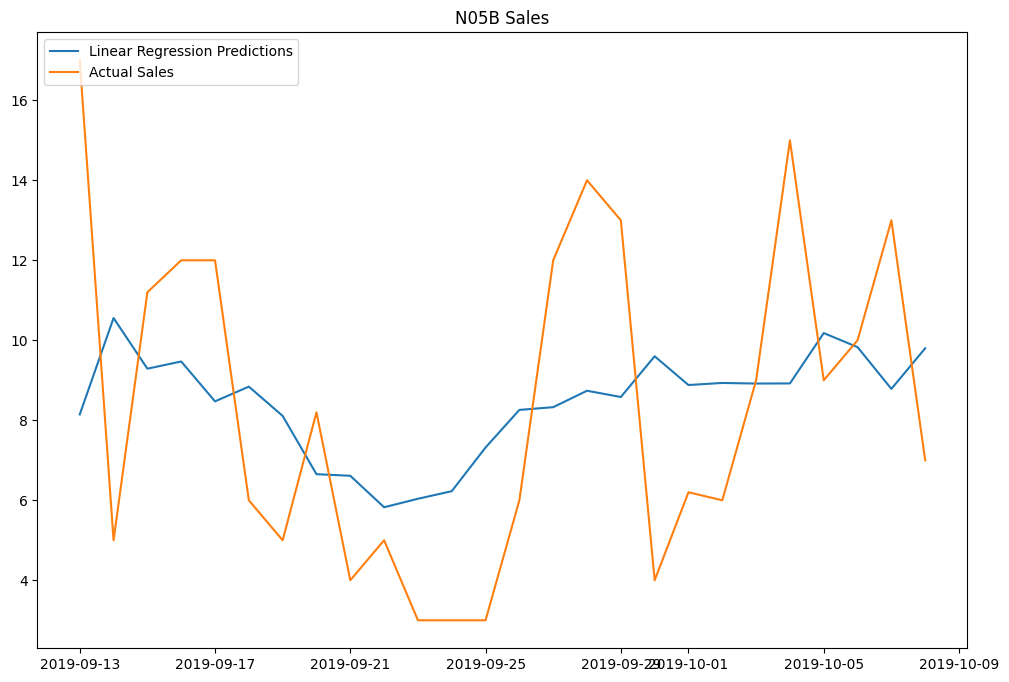

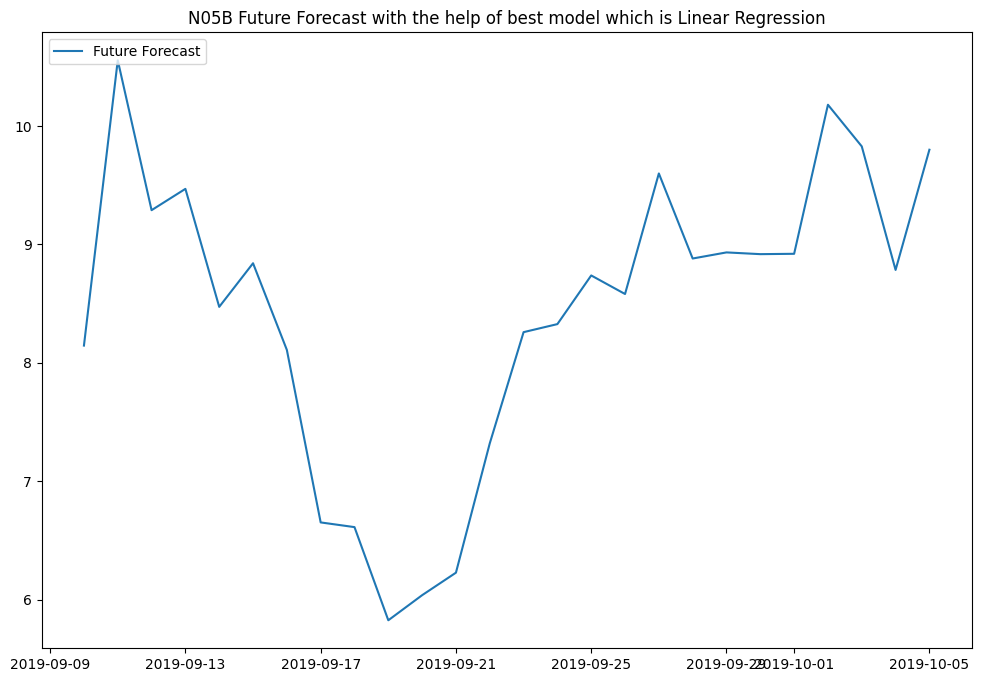

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}
Best parameters for Lasso: {'alpha': 0.1}
Best parameters for Ridge: {'alpha': 10}
Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True}
Best parameters for RandomForestRegressor: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


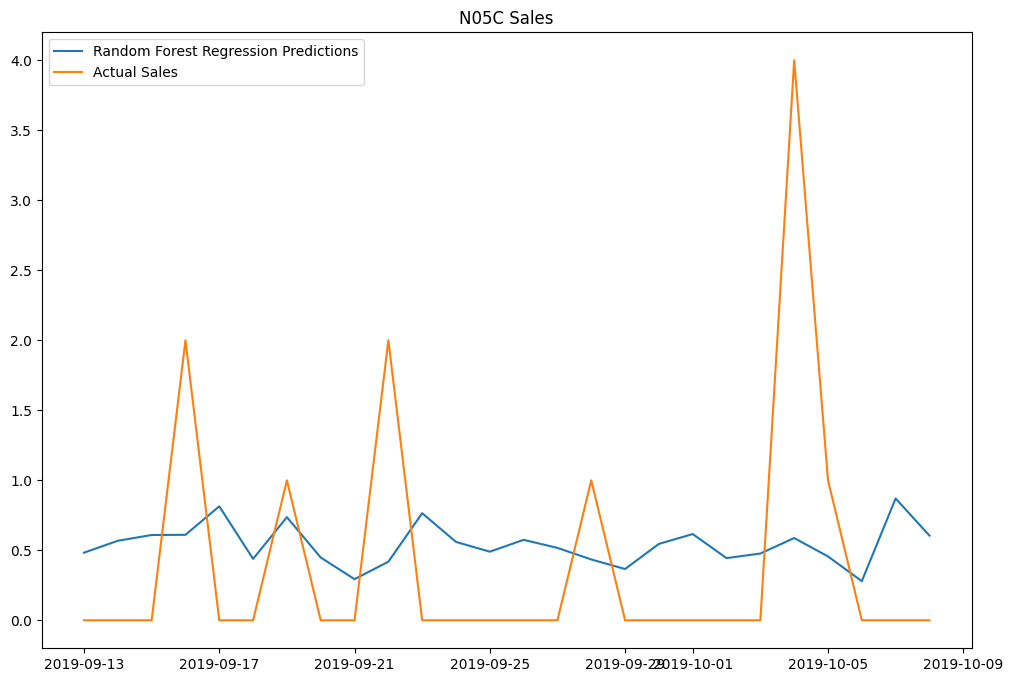

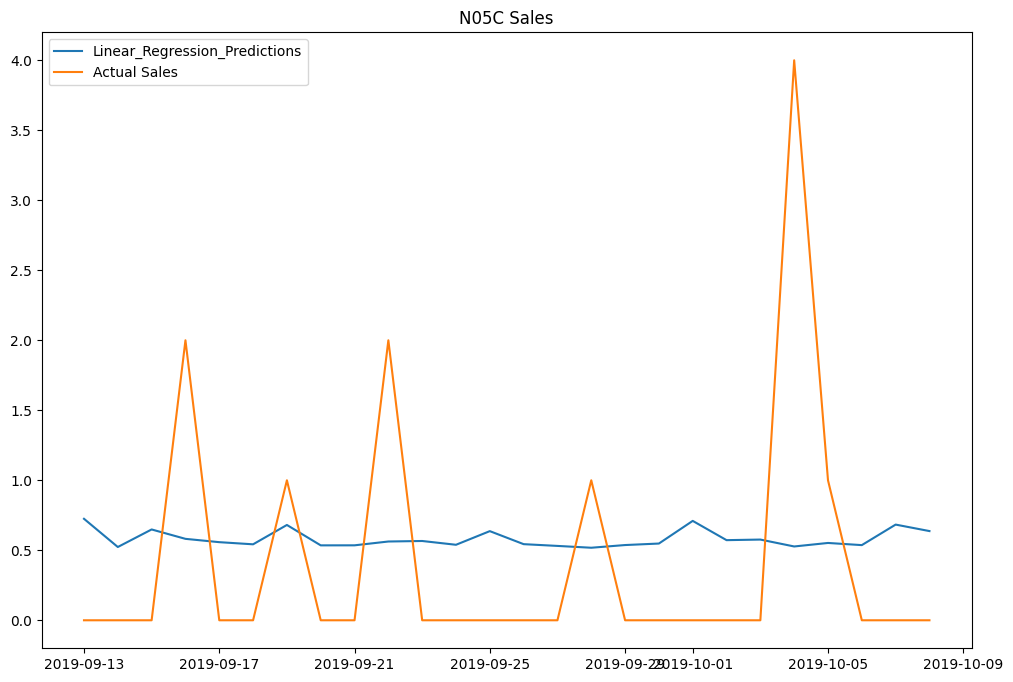

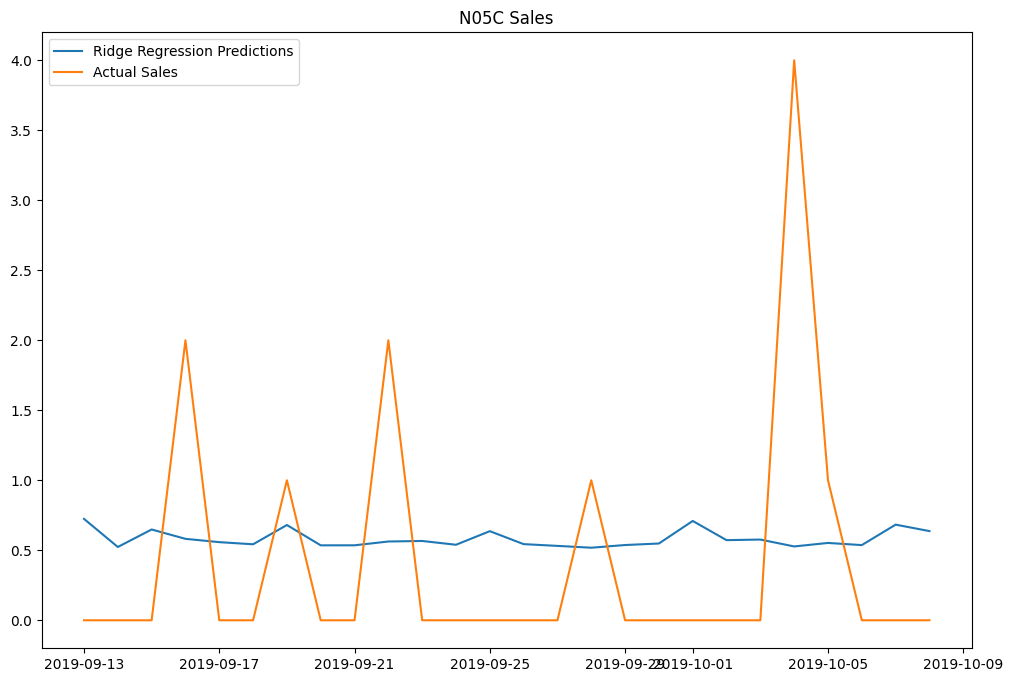

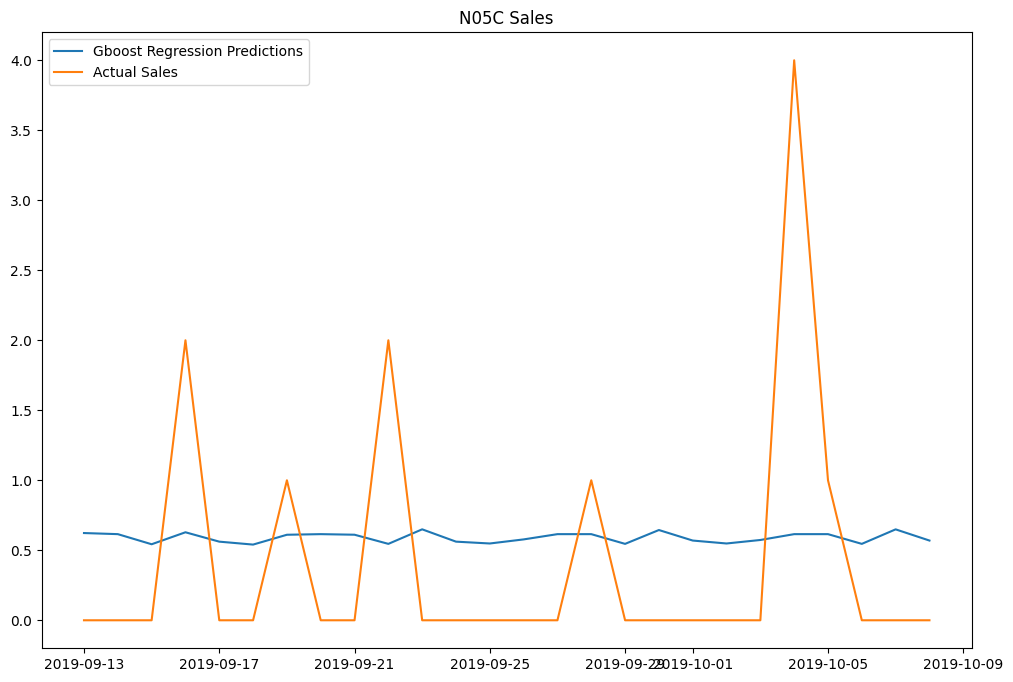

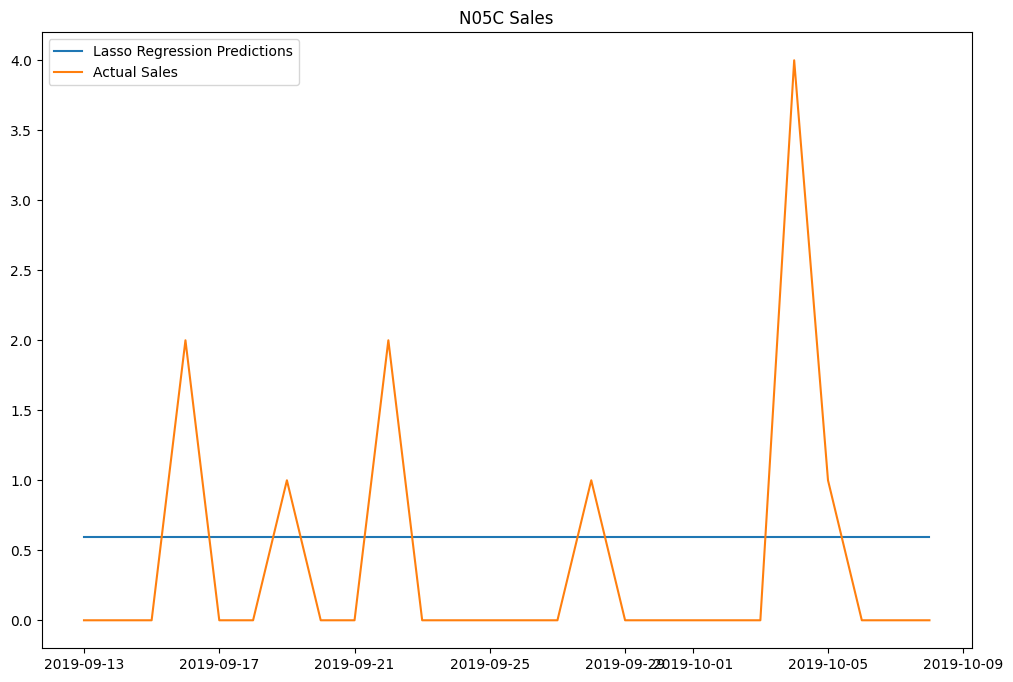

Root Mean Squared Error for Random Forest Regression Model is: 0.9314080381024897
Root Mean Squared Error for Linear Regression Model is: 0.9523389627292693
Root Mean Squared Error for Gradient Forest Regression Model is: 0.9360934197564543
Root Mean Squared Error for Lasso Regression Model is: 0.9431396920184033
Root Mean Squared Error for Ridge Regression Model is: 0.9522973284369751
The best model is: Random Forest with RMSE: 0.9314080381024897


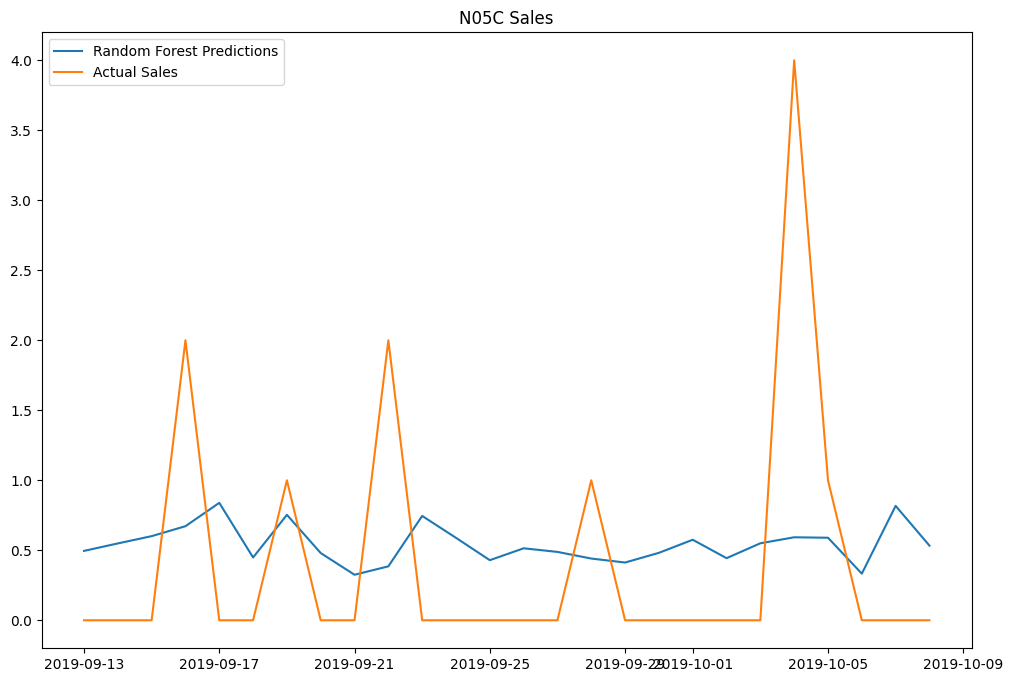

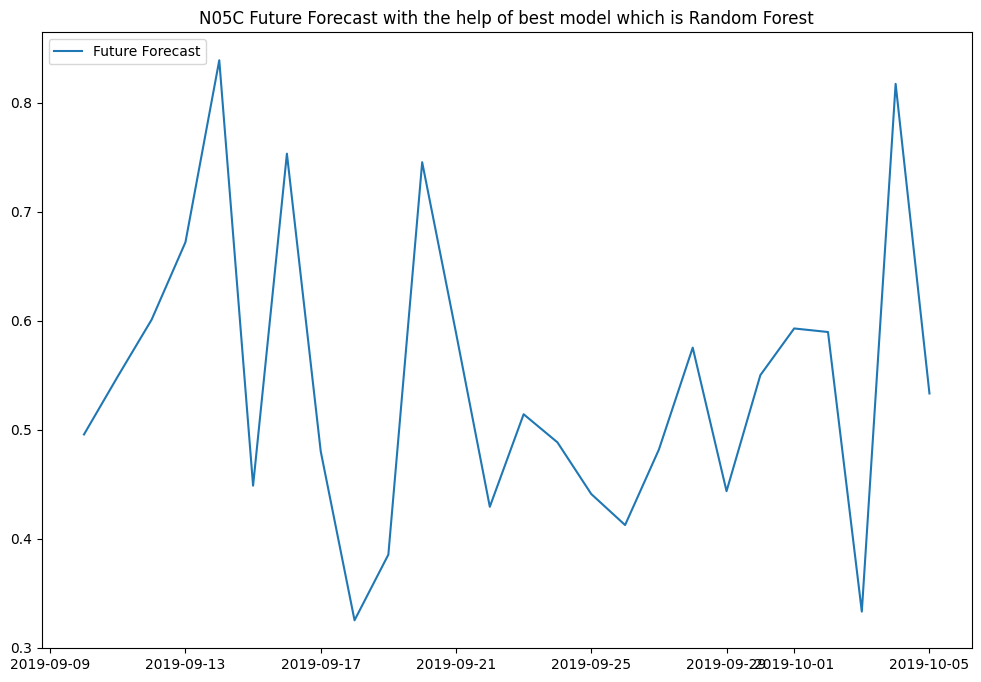

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best parameters for Lasso: {'alpha': 0.01}
Best parameters for Ridge: {'alpha': 10}
Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True}
Best parameters for RandomForestRegressor: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


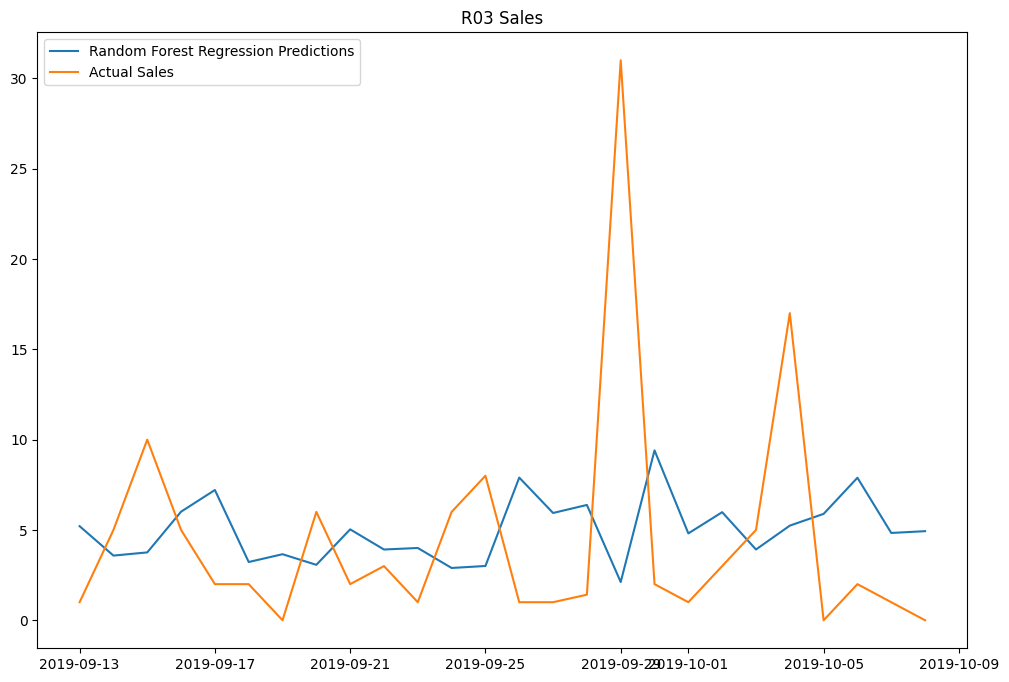

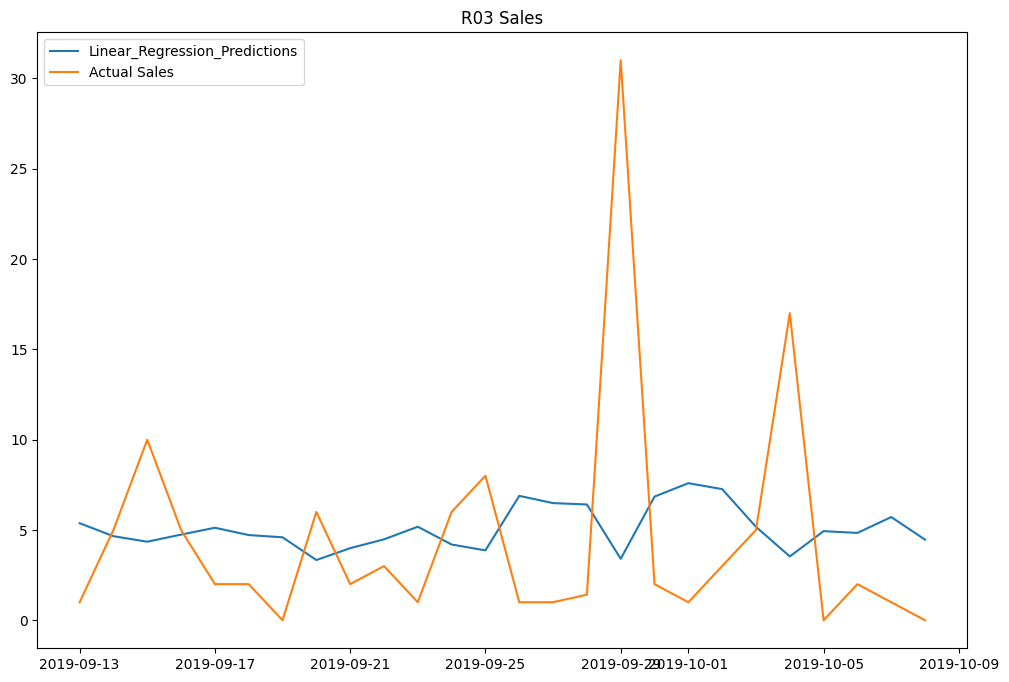

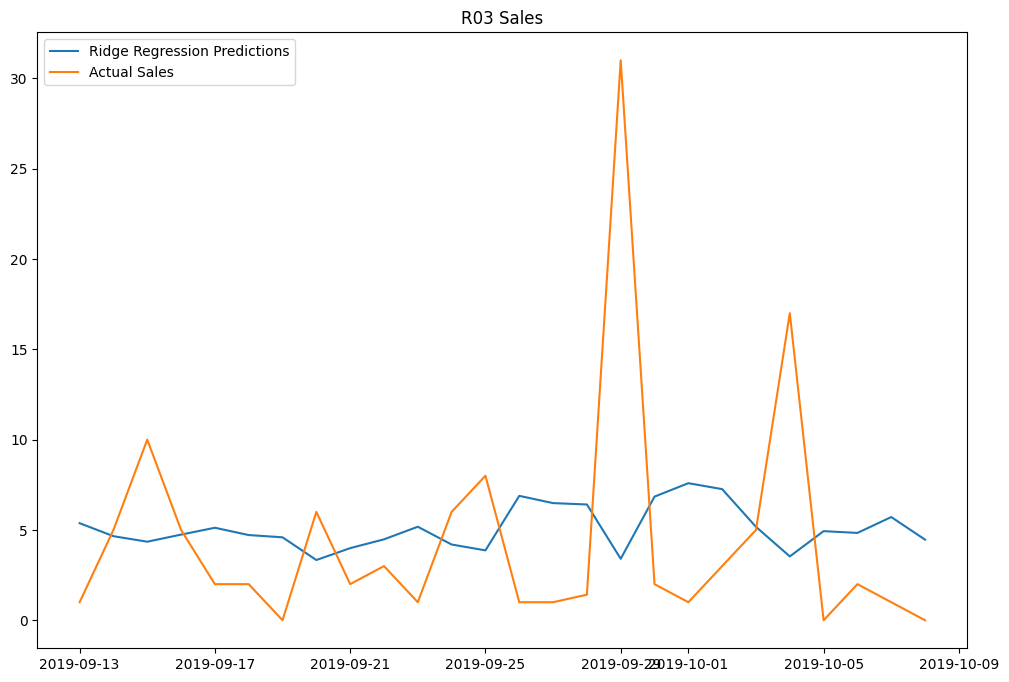

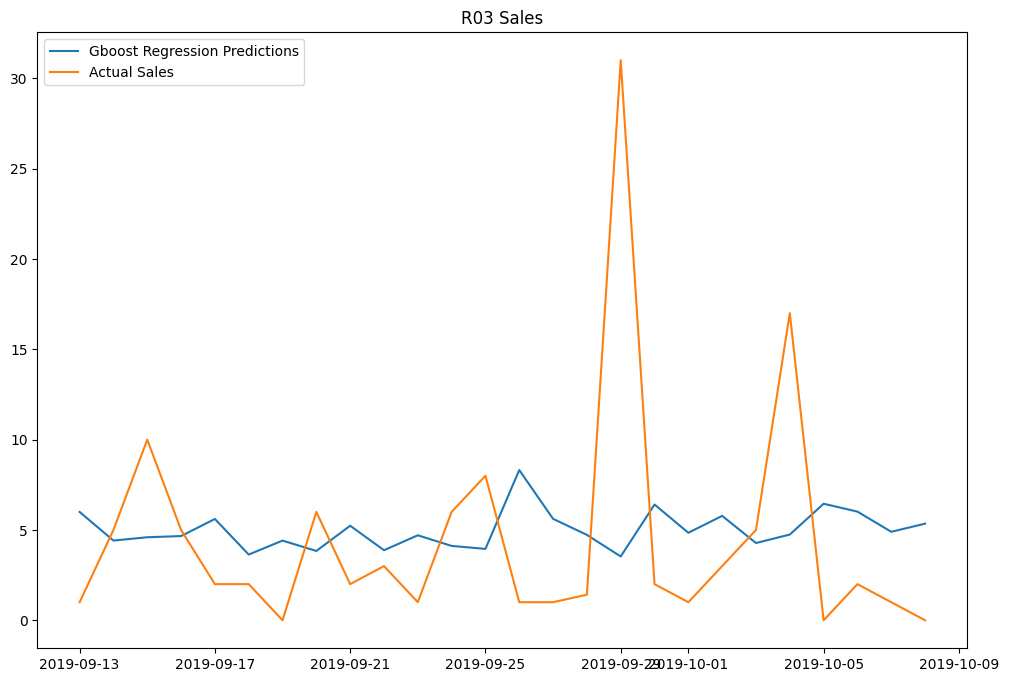

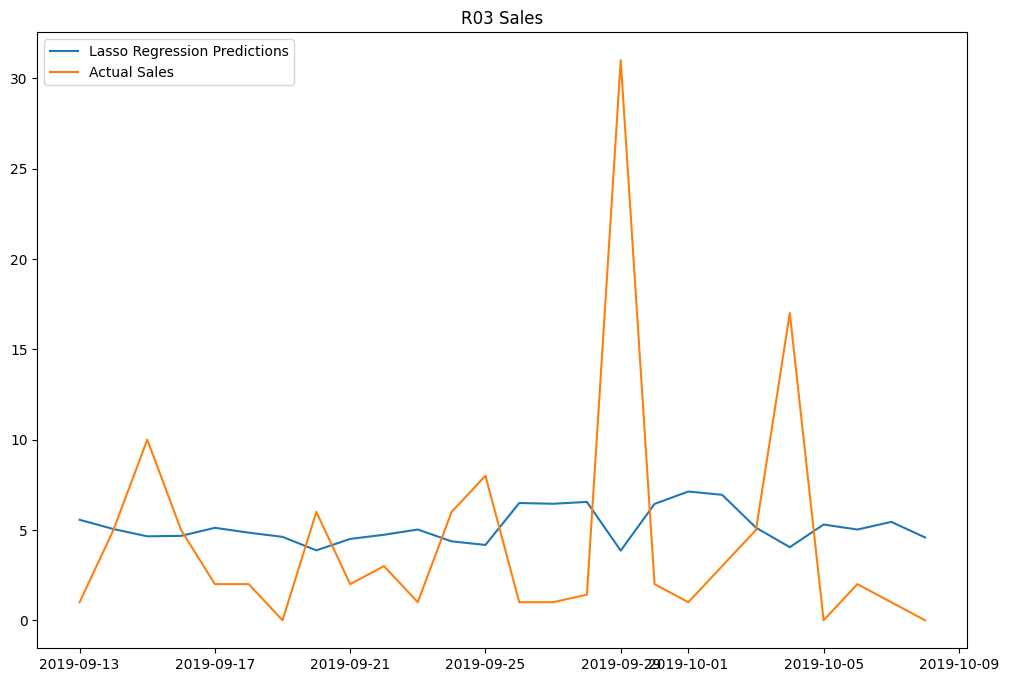

Root Mean Squared Error for Random Forest Regression Model is: 7.29239371532476
Root Mean Squared Error for Linear Regression Model is: 7.159546467672075
Root Mean Squared Error for Gradient Forest Regression Model is: 6.999458637227101
Root Mean Squared Error for Lasso Regression Model is: 7.010372456054065
Root Mean Squared Error for Ridge Regression Model is: 7.159453011263423
The best model is: Gradient Boosting with RMSE: 6.999458637227101


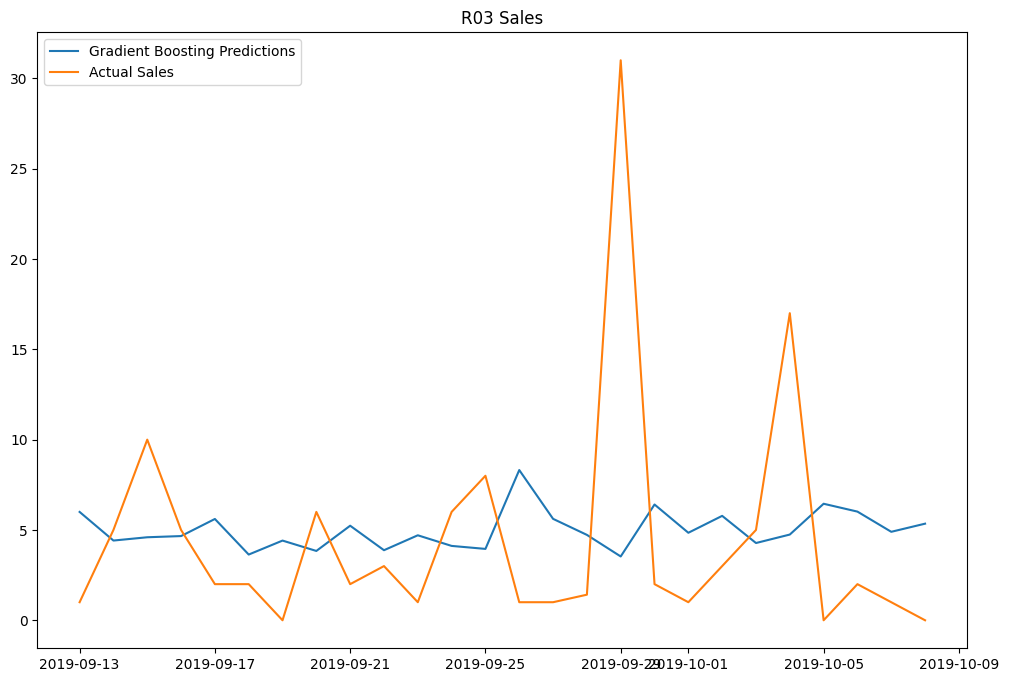

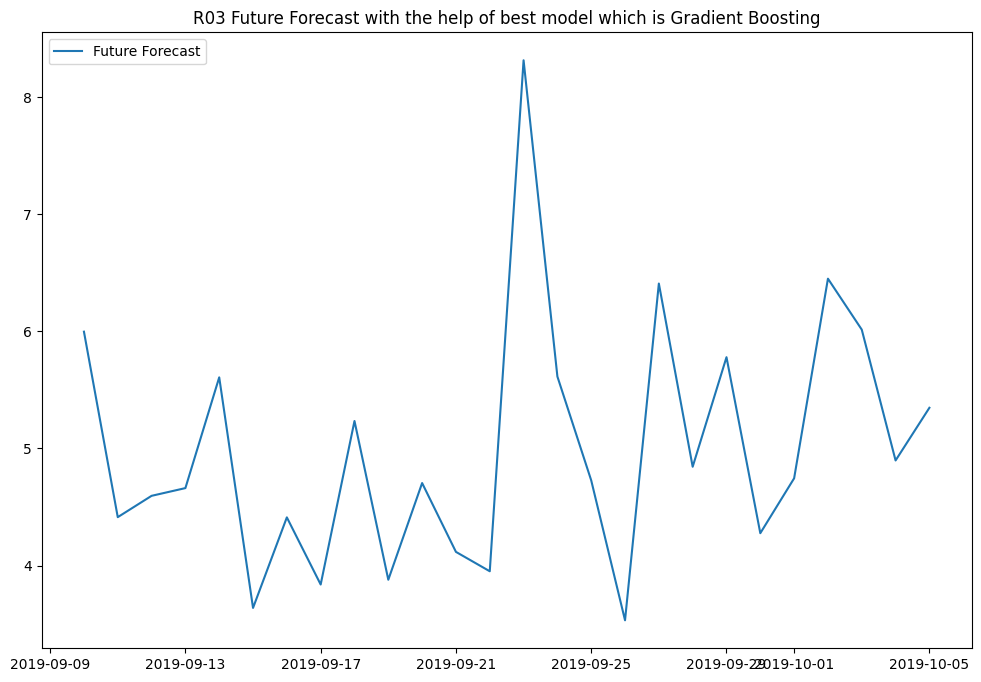

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best parameters for Lasso: {'alpha': 0.01}
Best parameters for Ridge: {'alpha': 10}
Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True}
Best parameters for RandomForestRegressor: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


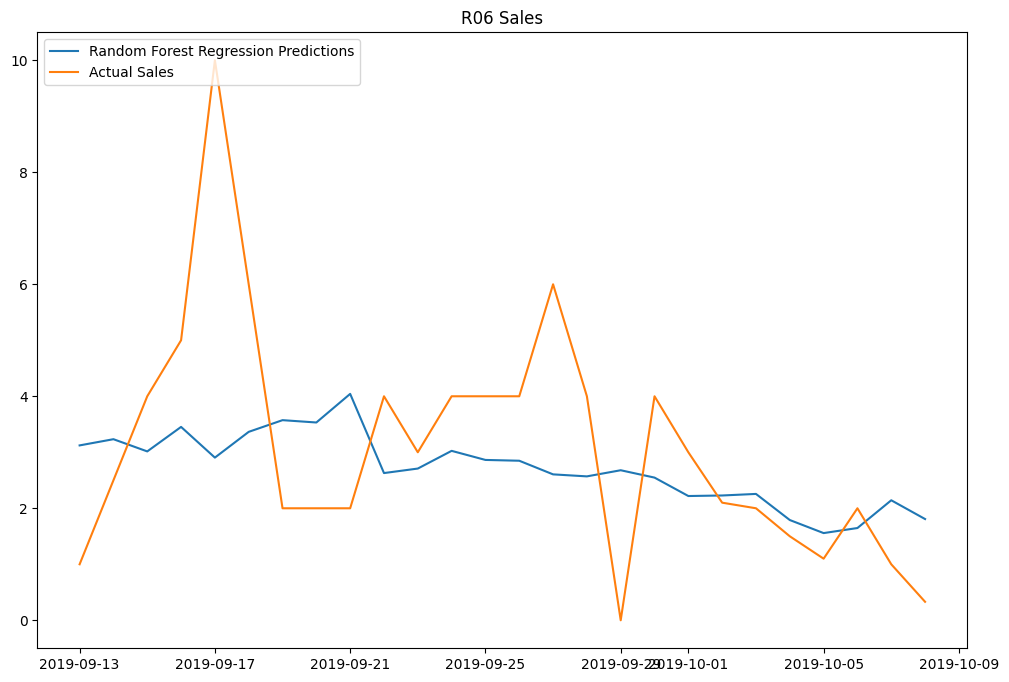

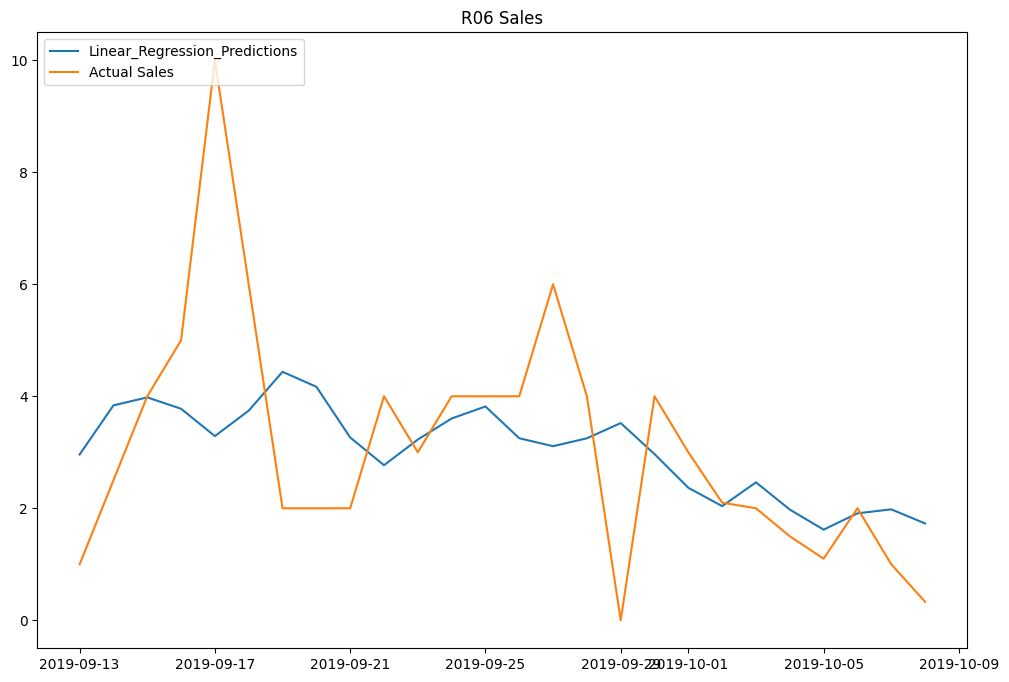

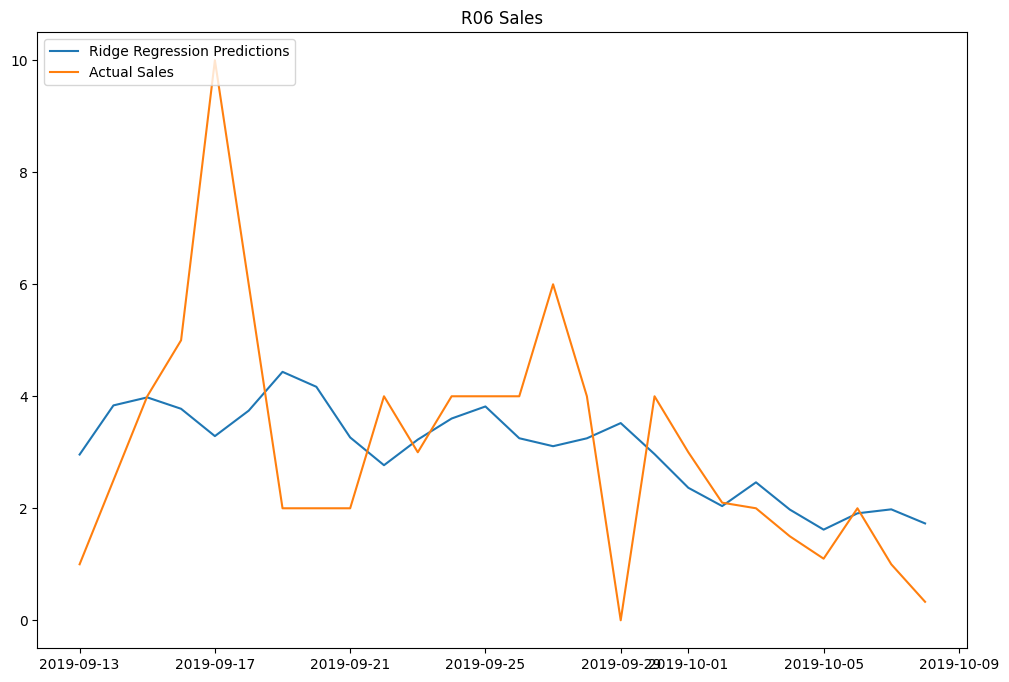

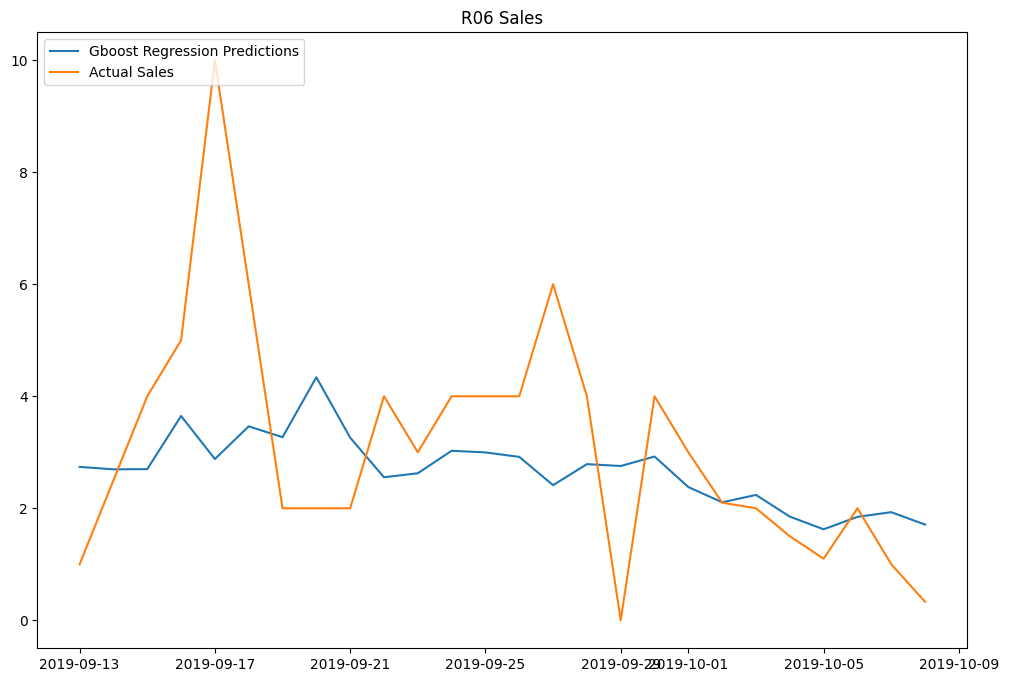

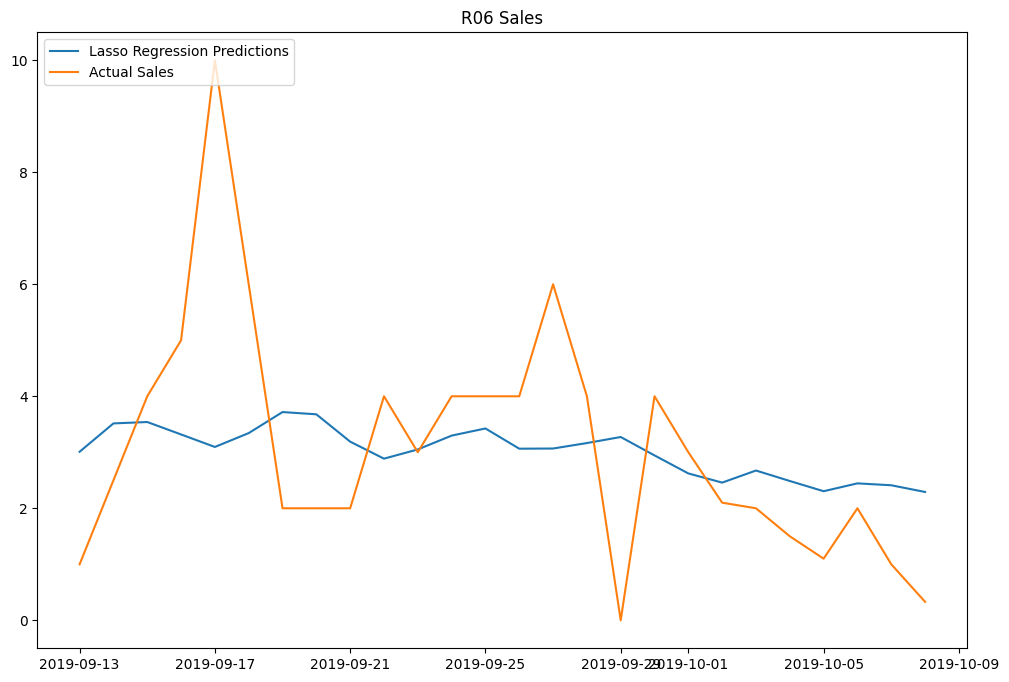

Root Mean Squared Error for Random Forest Regression Model is: 2.003635927019918
Root Mean Squared Error for Linear Regression Model is: 1.9440289278888911
Root Mean Squared Error for Gradient Forest Regression Model is: 2.0044435918381738
Root Mean Squared Error for Lasso Regression Model is: 1.9931648971661602
Root Mean Squared Error for Ridge Regression Model is: 1.9440016776304596
The best model is: Ridge Regression with RMSE: 1.9440016776304596


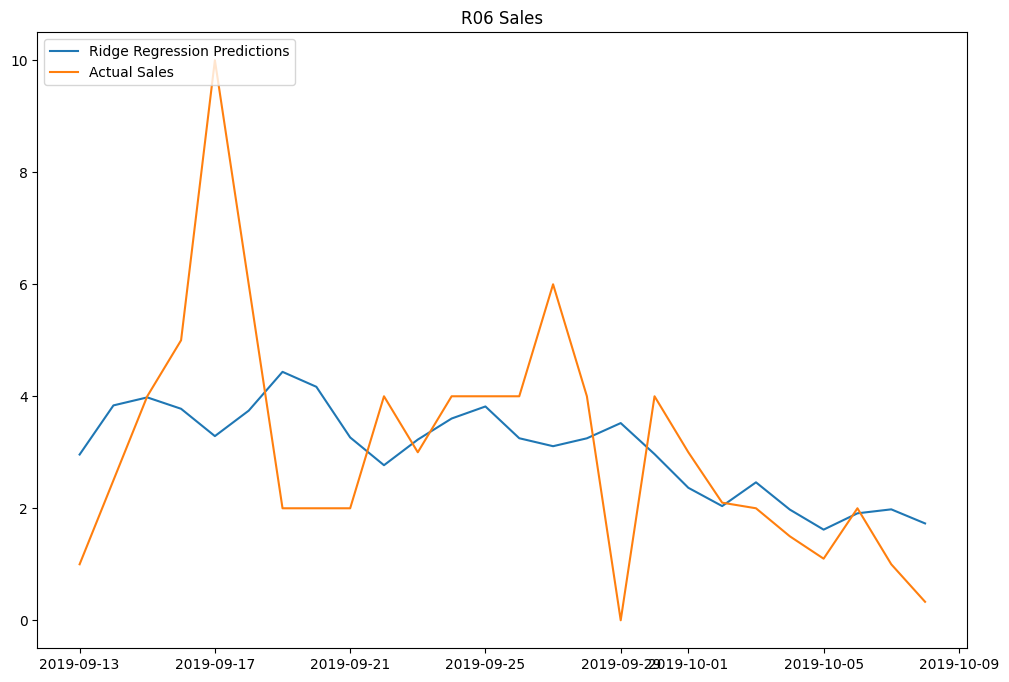

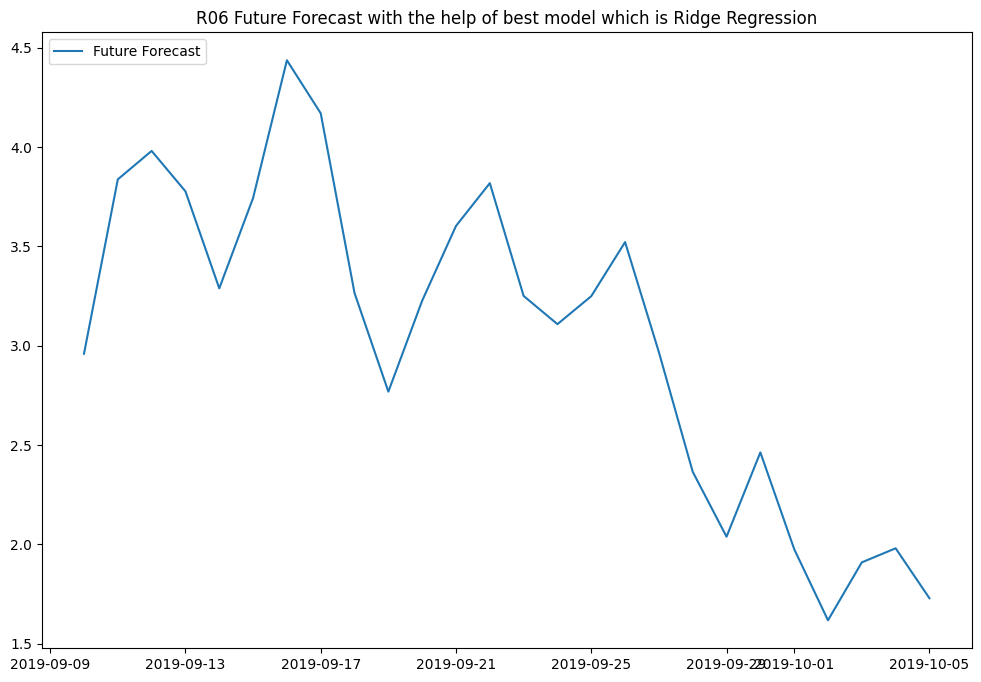

In [46]:
import numpy as np
lst = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
for i in lst:
    df_daily_m = df_daily[['Month','Weekday Name',i]]
    
    df_daily_m = df_daily_m.copy()

    df_daily_m.loc[:, 'Sale_LastDay'] = df_daily_m[i].shift(+1)
    df_daily_m.loc[:, 'Sale_2Daysback'] = df_daily_m[i].shift(+2)
    df_daily_m.loc[:, 'Sale_3Daysback'] = df_daily_m[i].shift(+3)

    df_daily_m.loc[:, 'Sale_FutureDay'] = df_daily_m[i].shift(-1)
    df_daily_m.loc[:, 'Sale_2Daysafter'] = df_daily_m[i].shift(-2)
    df_daily_m.loc[:, 'Sale_3Daysafter'] = df_daily_m[i].shift(-3)
    
    df_daily_m = df_daily_m.dropna()

    import numpy as np

    split_date = pd.to_datetime('2019-09-10')

    features_columns = ['Sale_LastDay', 'Sale_2Daysback', 'Sale_3Daysback', 'Sale_FutureDay', 'Sale_2Daysafter', 'Sale_3Daysafter', 'Month', 'Weekday Name']
    X = df_daily_m[features_columns]
    y = df_daily_m[i]

    X = X.values
    y = y.values

    y = y.reshape(-1, 1)

    plit_date = pd.to_datetime('2019-09-10')
    split_index = df_daily_m1[df_daily_m.index == split_date].index[0]

    final_x = np.concatenate((X, y), axis=1)

    X_train, X_test, y_train, y_test = final_x[df_daily_m.index < split_date, :-1], final_x[df_daily_m.index >= split_date, :-1], final_x[df_daily_m.index < split_date, -1], final_x[df_daily_m.index >= split_date, -1]

    gboost_best_params, ridge_best_params, lasso_best_params, lin_best_params, rf_best_params = hyperparameterised(df_daily_m, i)

    from sklearn.linear_model import LinearRegression
    lin_model=LinearRegression(**lin_best_params)

    from sklearn.ensemble import RandomForestRegressor
    rforest_model=RandomForestRegressor(**rf_best_params)

    from sklearn.ensemble import GradientBoostingRegressor
    gboost_model=GradientBoostingRegressor(**gboost_best_params)

    from sklearn.linear_model import Ridge
    ridge_model = Ridge(**ridge_best_params)

    from sklearn.linear_model import Lasso
    Lasso_model = Ridge(**lasso_best_params)

    rforest_model.fit(X_train, y_train.ravel())
    lin_model.fit(X_train,y_train)
    ridge_model.fit(X_train,y_train)
    gboost_model.fit(X_train,y_train.ravel())
    lasso_model.fit(X_train, y_train)
    
    rforest_pred=rforest_model.predict(X_test)
    plt.rcParams["figure.figsize"] = (12,8)
    plt.title(i+ " Sales")
    plt.plot(dx,rforest_pred,label='Random Forest Regression Predictions')
    plt.plot(dx,y_test,label='Actual Sales')
    plt.legend(loc="upper left")
    plt.show()
    
    lin_pred=lin_model.predict(X_test)
    plt.rcParams["figure.figsize"] = (12,8)
    plt.title(i+" Sales")
    plt.plot(dx,lin_pred,label='Linear_Regression_Predictions')
    plt.plot(dx,y_test,label='Actual Sales')
    plt.legend(loc="upper left")
    plt.show()

    ridge_pred = ridge_model.predict(X_test)
    plt.rcParams["figure.figsize"] = (12,8)
    plt.title(i+" Sales")
    plt.plot(dx,ridge_pred,label='Ridge Regression Predictions')
    plt.plot(dx,y_test,label='Actual Sales')
    plt.legend(loc="upper left")
    plt.show()

    gboost_pred = gboost_model.predict(X_test)
    plt.rcParams["figure.figsize"] = (12,8)
    plt.title(i+" Sales")
    plt.plot(dx,gboost_pred,label='Gboost Regression Predictions')
    plt.plot(dx,y_test,label='Actual Sales')
    plt.legend(loc="upper left")
    plt.show()

    lasso_pred = lasso_model.predict(X_test)
    plt.rcParams["figure.figsize"] = (12,8)
    plt.title(i+" Sales")
    plt.plot(dx,lasso_pred,label='Lasso Regression Predictions')
    plt.plot(dx,y_test,label='Actual Sales')
    plt.legend(loc="upper left")
    plt.show()

    best_model,best_model_name = choosing_model(rforest_model,lin_model,ridge_model,gboost_model,lasso_model,X_train,y_train,X_test,y_test)
    best_pred = best_model.predict(X_test)
    plt.rcParams["figure.figsize"] = (12,8)
    plt.title(i+" Sales")
    plt.plot(dx,best_pred,label= best_model_name+' Predictions')
    plt.plot(dx,y_test,label='Actual Sales')
    plt.legend(loc="upper left")
    plt.show()
    
    from datetime import datetime, timedelta
    start_date = datetime(2019, 9, 10)
    end_date = datetime(2023, 9, 10)
    features = df_daily_m[['Sale_LastDay', 'Sale_2Daysback', 'Sale_3Daysback', 'Sale_FutureDay', 'Sale_2Daysafter', 'Sale_3Daysafter', 'Month', 'Weekday Name']]
    predictions = predict_future_sales(best_model, features, start_date, end_date)
    plt.rcParams["figure.figsize"] = (12,8)
    plt.title(i+" Future Forecast with the help of best model which is "+best_model_name)
    plt.plot(predictions,label='Future Forecast')
    plt.legend(loc="upper left")
    plt.show()

# Observations
1) The various models I created for each drug was better in predicting values in and around mean and median values but less accurate in predicting peaks and valleys.
2) Of the five models I had chosen that could help in the regression each got atleast picked once and maximum they were individually chosen twice:
    * Random Forest Regression was picked as the best model twice for M01AE and NO2BE
    * Ridge Regression was picked as the best model twice for N02BA and R06
    * Gradient Boost Regression was picked as the best model twice for N05C and R03
    * Linear Regression was picked as the best model once for NO5B
    * Lasso Regression was picked as the best model once for M01AB

# Improvements that can be made in the project
1) In this project I have used various regression techniques to predict the future sales instead we could also use Autoregressive Moving Average (ARMA) or Autoregressive Integrated Moving Average (ARIMA) concepts and their related respective packages to create our ML model.
2) We could also try if deep learning could also help us in not only giving accurate results but also they might help in improving performance by using tensors that are run on a machine with a dedicated GPU by utilising GPU acceleration.
3) A better feature engineering by incorporating things like Principal Component Analysis(PCA), binning, etc.